In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load data from csv file
'''
data = pd.read_csv('vn_selected.csv')
data_vn_notchosen = data.copy()
data_vn_notchosen.head()
# Load data from csv file
data = pd.read_csv('vn_selected.csv')
data_vn = data.copy()
data_vn.head()'''

"\ndata = pd.read_csv('vn_selected.csv')\ndata_vn_notchosen = data.copy()\ndata_vn_notchosen.head()\n# Load data from csv file\ndata = pd.read_csv('vn_selected.csv')\ndata_vn = data.copy()\ndata_vn.head()"

In [ ]:
#data_vn.describe()

In [ ]:
#data_vn.info()

In [ ]:
# Load data from csv file
data = pd.read_csv('CII-VNINDEX-History.csv')
data_vn = data.copy()
data_vn.head(10)

Unnamed: 0     Open     High      Low    Close  Volume TradingDate
0           0  10850.0  10563.0  10563.0  10563.0  275600  2006-05-18
1           1  10308.0  10032.0  10032.0  10032.0  443520  2006-05-19
2           2   9809.0   9548.0   9548.0   9548.0   64200  2006-05-22
3           3   9331.0   9079.0   9079.0   9079.0   12760  2006-05-23
4           4   8876.0   8641.0   8641.0   8641.0   46460  2006-05-24
5           5   8442.0   8218.0   8218.0   8218.0  156690  2006-05-25
6           6   8029.0   7818.0   7818.0   7818.0   40310  2006-05-26
7           7   7639.0   7434.0   7434.0   7434.0   65110  2006-05-29
8           8   7270.0   7073.0   7073.0   7073.0   19540  2006-05-30
9           9   6922.0   6734.0   6734.0   6734.0   31850  2006-05-31

In [ ]:
data_vn = data_vn.copy()
data_vn.drop(columns=['Unnamed: 0'], inplace=True)
data_vn.head()

Open     High      Low    Close  Volume TradingDate
0  10850.0  10563.0  10563.0  10563.0  275600  2006-05-18
1  10308.0  10032.0  10032.0  10032.0  443520  2006-05-19
2   9809.0   9548.0   9548.0   9548.0   64200  2006-05-22
3   9331.0   9079.0   9079.0   9079.0   12760  2006-05-23
4   8876.0   8641.0   8641.0   8641.0   46460  2006-05-24

In [ ]:
data_vn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         4186 non-null   float64
 1   High         4186 non-null   float64
 2   Low          4186 non-null   float64
 3   Close        4186 non-null   float64
 4   Volume       4186 non-null   int64  
 5   TradingDate  4186 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 196.3+ KB


# Preprocess

In [ ]:
data_vn.iloc[:, slice(None, -1)].head()

Open     High      Low    Close  Volume
0  10850.0  10563.0  10563.0  10563.0  275600
1  10308.0  10032.0  10032.0  10032.0  443520
2   9809.0   9548.0   9548.0   9548.0   64200
3   9331.0   9079.0   9079.0   9079.0   12760
4   8876.0   8641.0   8641.0   8641.0   46460

In [ ]:
import preprocess as pp

In [ ]:
samples = pp.get_data_samples_ks_day(data_vn, 7, slice(None,-1), label_colID=-3)

In [ ]:
data_vn.iloc[30:, :]

Open     High      Low    Close   Volume TradingDate
30     7161.0   6973.0   6952.0   6973.0    64250  2006-06-29
31     7161.0   7242.0   6967.0   7242.0   140080  2006-06-30
32     7378.0   7184.0   7142.0   7142.0    33510  2006-07-03
33     7270.0   7142.0   7078.0   7142.0    55160  2006-07-04
34     7335.0   7140.0   7119.0   7119.0    12850  2006-07-05
...       ...      ...      ...      ...      ...         ...
4181  13950.0  14150.0  13500.0  13500.0  3662517  2023-02-22
4182  13500.0  13650.0  13000.0  13500.0  2814643  2023-02-23
4183  13650.0  13650.0  13150.0  13150.0  1366663  2023-02-24
4184  13000.0  13450.0  12850.0  12950.0  1975666  2023-02-27
4185  13400.0  13400.0  12900.0  12950.0  1292859  2023-02-28

[4156 rows x 6 columns]

In [ ]:
X_data = samples[0]
y_data = samples[1]
print(y_data[0])

[6973. 7242. 7142. 7142. 7119. 7157. 7395.]


# MODELS

## input shape

In [ ]:
window_size=30

In [ ]:
num_features = pp.get_num_features(slice(None,-1), data_vn)
num_features

5

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_lstm(input_shape):
  # Define the model
  model_lstm = Sequential([
      LSTM(64, input_shape=input_shape, return_sequences=True),
      Dropout(0.2),
      LSTM(32, return_sequences=False),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(7)
  ])
  return model_lstm

In [ ]:
model_lstm = create_lstm((window_size, num_features))
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           3,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,343 (134.15 KB)

 Trainable params: 34,343 (134.15 KB)

 Non-trainable params: 0 (0.00 B)

## GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_gru(input_shape):
  # Define the model
  model_gru = Sequential([
      GRU(64, input_shape=input_shape, return_sequences=True),
      GRU(32, return_sequences=False),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(7)
  ])
  return model_gru

In [ ]:
model_gru = create_gru((window_size, num_features))
model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 64)              │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │           3,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,047 (105.65 KB)

 Trainable params: 27,047 (105.65 KB)

 Non-trainable params: 0 (0.00 B)

##BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bilstm(input_shape):
  # Define the model
  model_bilstm = Sequential([
      LSTM(64, input_shape=input_shape, return_sequences=True),
      Bidirectional(LSTM(32, return_sequences=False)),
      Dropout(0.2),
      Dense(100, activation='relu'),
      Dense(7)
  ])
  return model_bilstm

In [ ]:
model_bilstm = create_bilstm((window_size, num_features))
model_bilstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,959 (195.15 KB)

 Trainable params: 49,959 (195.15 KB)

 Non-trainable params: 0 (0.00 B)

## BiGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bigru(input_shape):
  # Define the model
  model_bigru = Sequential([
      GRU(64, input_shape=input_shape, return_sequences=True),
      Bidirectional(GRU(32, return_sequences=False)),
      Dropout(0.2),
      Dense(100, activation='relu'),
      Dense(7)
  ])
  return model_bigru

In [ ]:
model_bigru = create_bigru((window_size, num_features))
model_bigru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 64)              │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,655 (154.90 KB)

 Trainable params: 39,655 (154.90 KB)

 Non-trainable params: 0 (0.00 B)

# FUNCTIONS

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [ ]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'], color='b',label='Training Loss')
    axes[0].plot(history.history['val_loss'], color='r',label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'], color='b',label='Training MAE')
    axes[1].plot(history.history['val_mae'], color='r',label='Validation MAE')
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Close price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 7)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[10], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[10], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Open Prices Over the Next 7th Day for Sample 10th', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Close Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# time series split train

In [ ]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (3319, 30, 5)
Shape of scaled test set:  (830, 30, 5)

Shape of scales training label  (3319, 7)
Shape of scales test label  (830, 7)


In [ ]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_gru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
    X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
    #X_test = X_test.reshape(X_test.shape[0], window_size, num_features)
    model_gru = create_gru((window_size, num_features))
    model_gru.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mae'])
    # Train the model. Using Colab for training
    history_gru_ts = model_gru.fit(X_train, y_train, # Data feature and data label
                    batch_size=2048, # Batch size
                    epochs=20, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_gru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - loss: 0.0042 - mae: 0.0479 - val_loss: 0.0029 - val_mae: 0.0393
Epoch 18/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step - loss: 0.0038 - mae: 0.0458 - val_loss: 0.0026 - val_mae: 0.0365
Epoch 19/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0022 - val_mae: 0.0333
Epoch 20/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - loss: 0.0032 - mae: 0.0418 - val_loss: 0.0021 - val_mae: 0.0327
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - mae: 0.0439
Validation loss for fold: [0.0020948247984051704, 0.0327053964138031]
Mean validation loss: 0.015230442833853886
Standard deviation of validation loss: 0.01438335146240293


In [ ]:
print("=========GRU===========")
model_gru_ts = get_model_n_evaluate("/content/model_gru_ts.keras", X_test_norm, y_test_norm)
y_pred_denom_gru_ts = get_reverse_prediction(model_gru_ts, X_test_norm, y_scaler)

=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - mae: 0.0274
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0053102062083780766, mae = 0.0415264368057251
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
MSE on the test set:  0.005310206470977334
Shape of denormalized training set:  (830, 7)


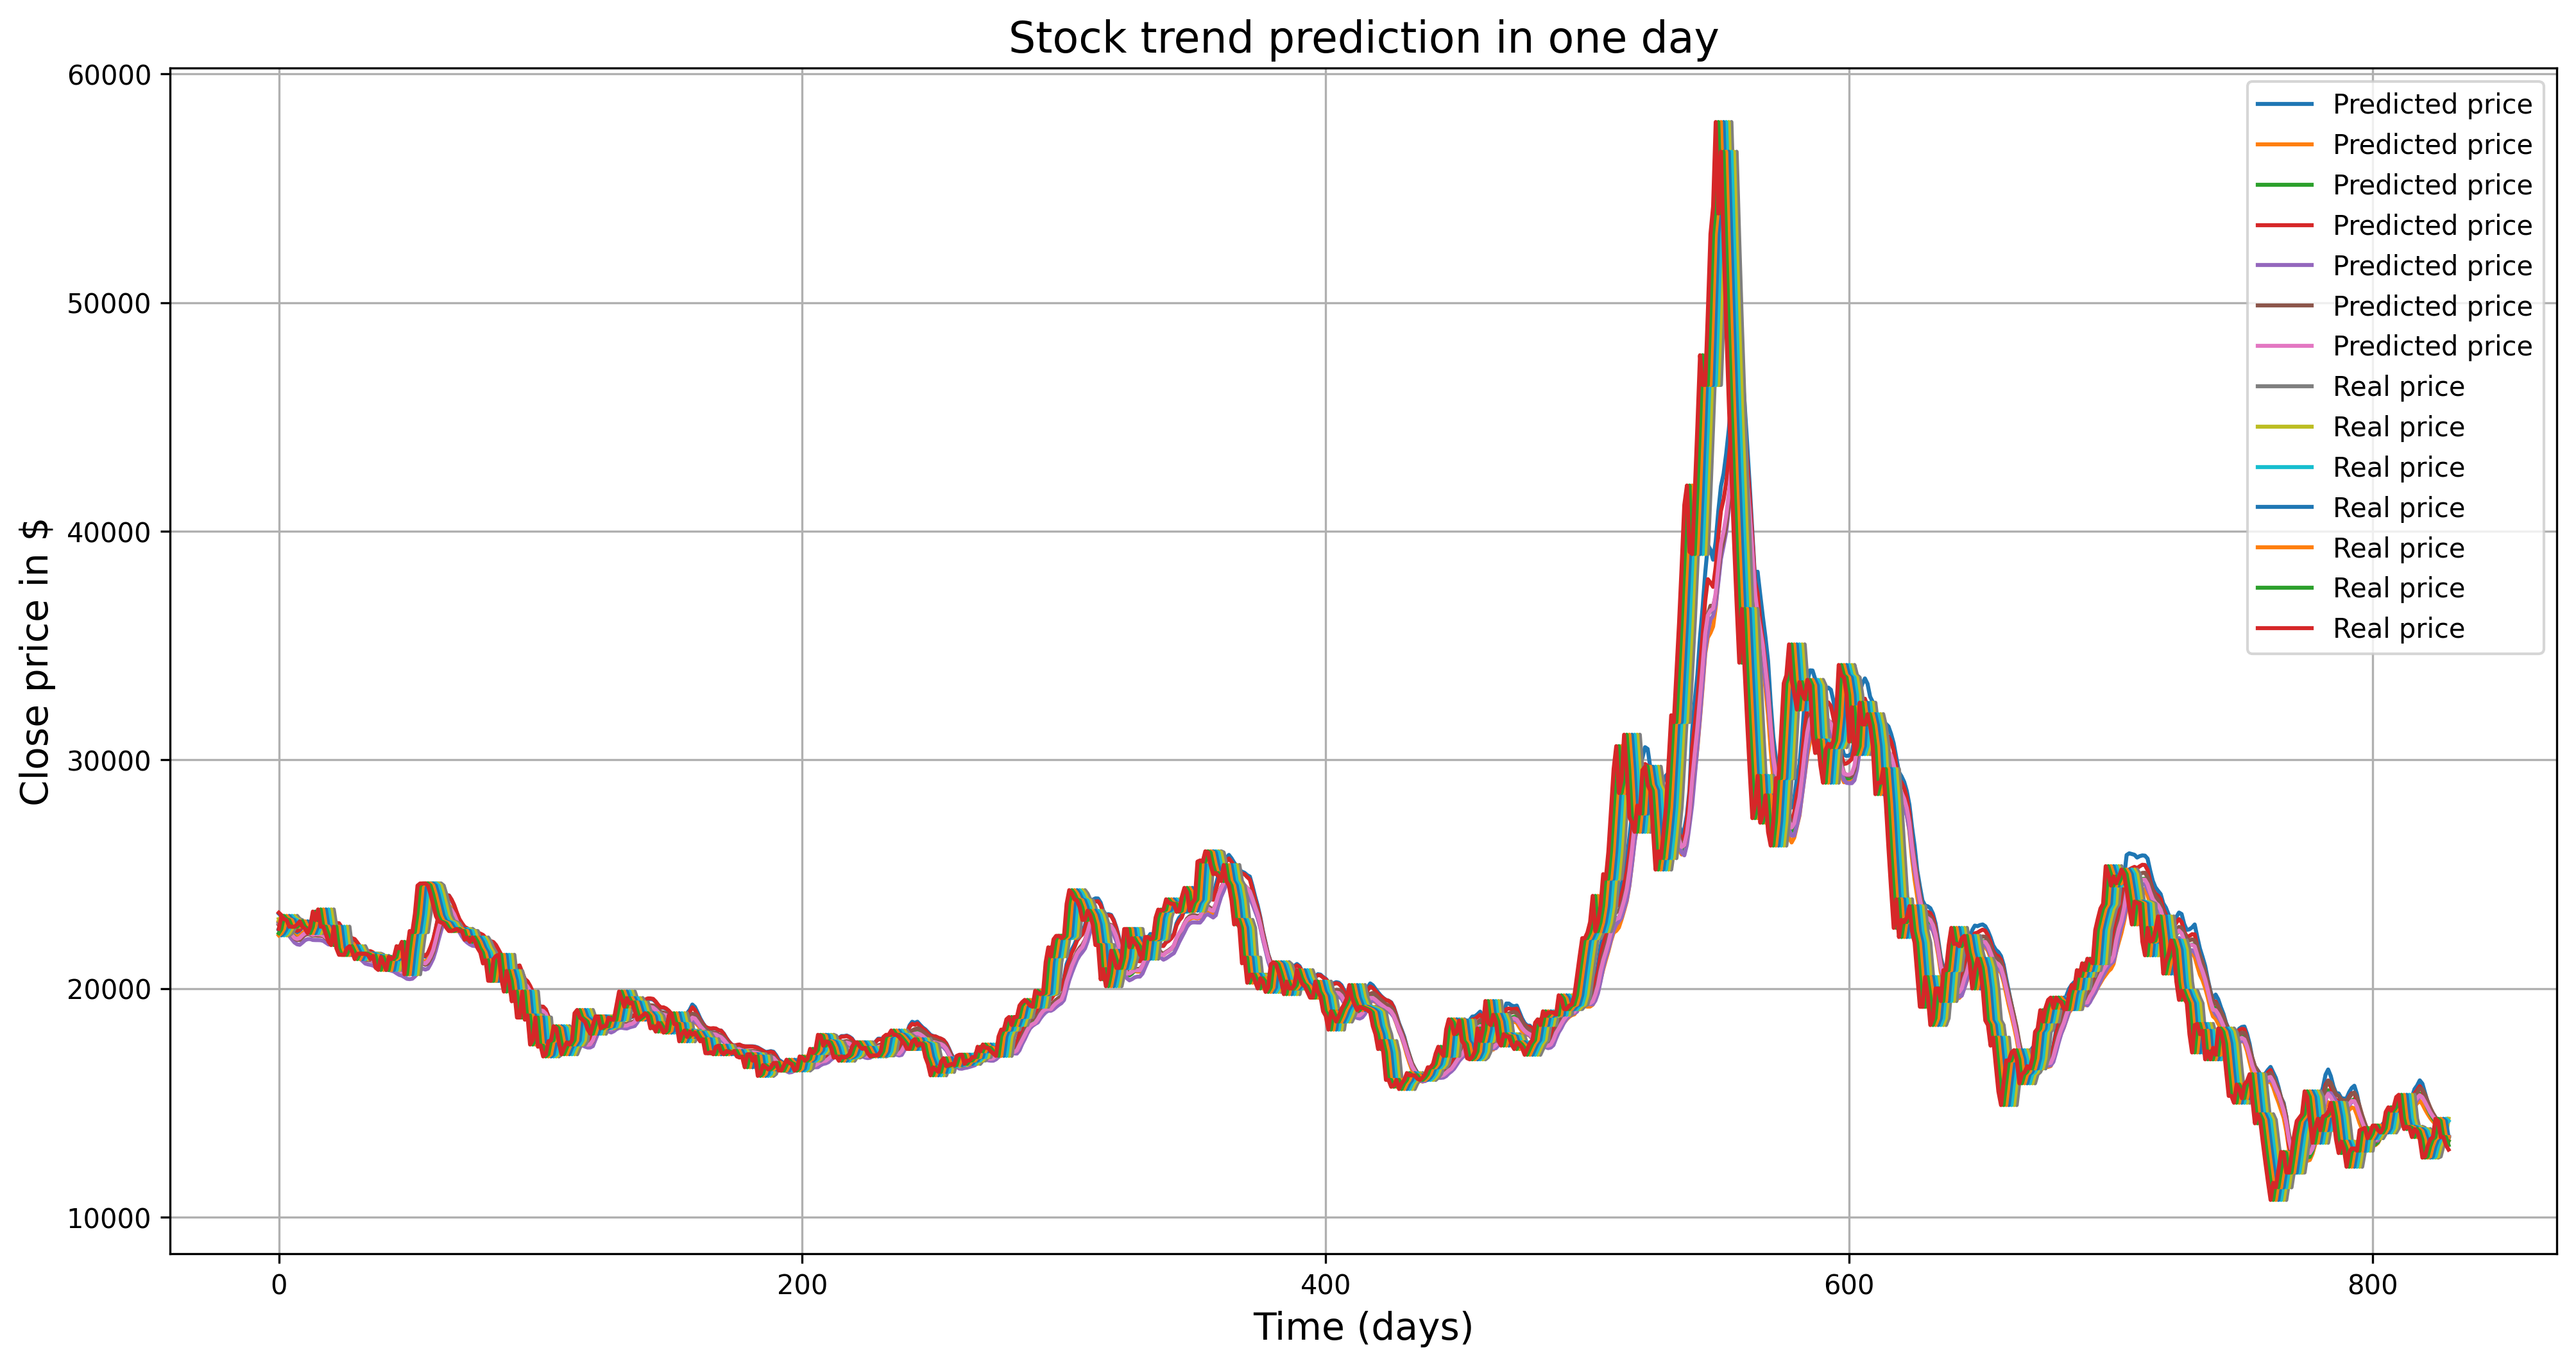

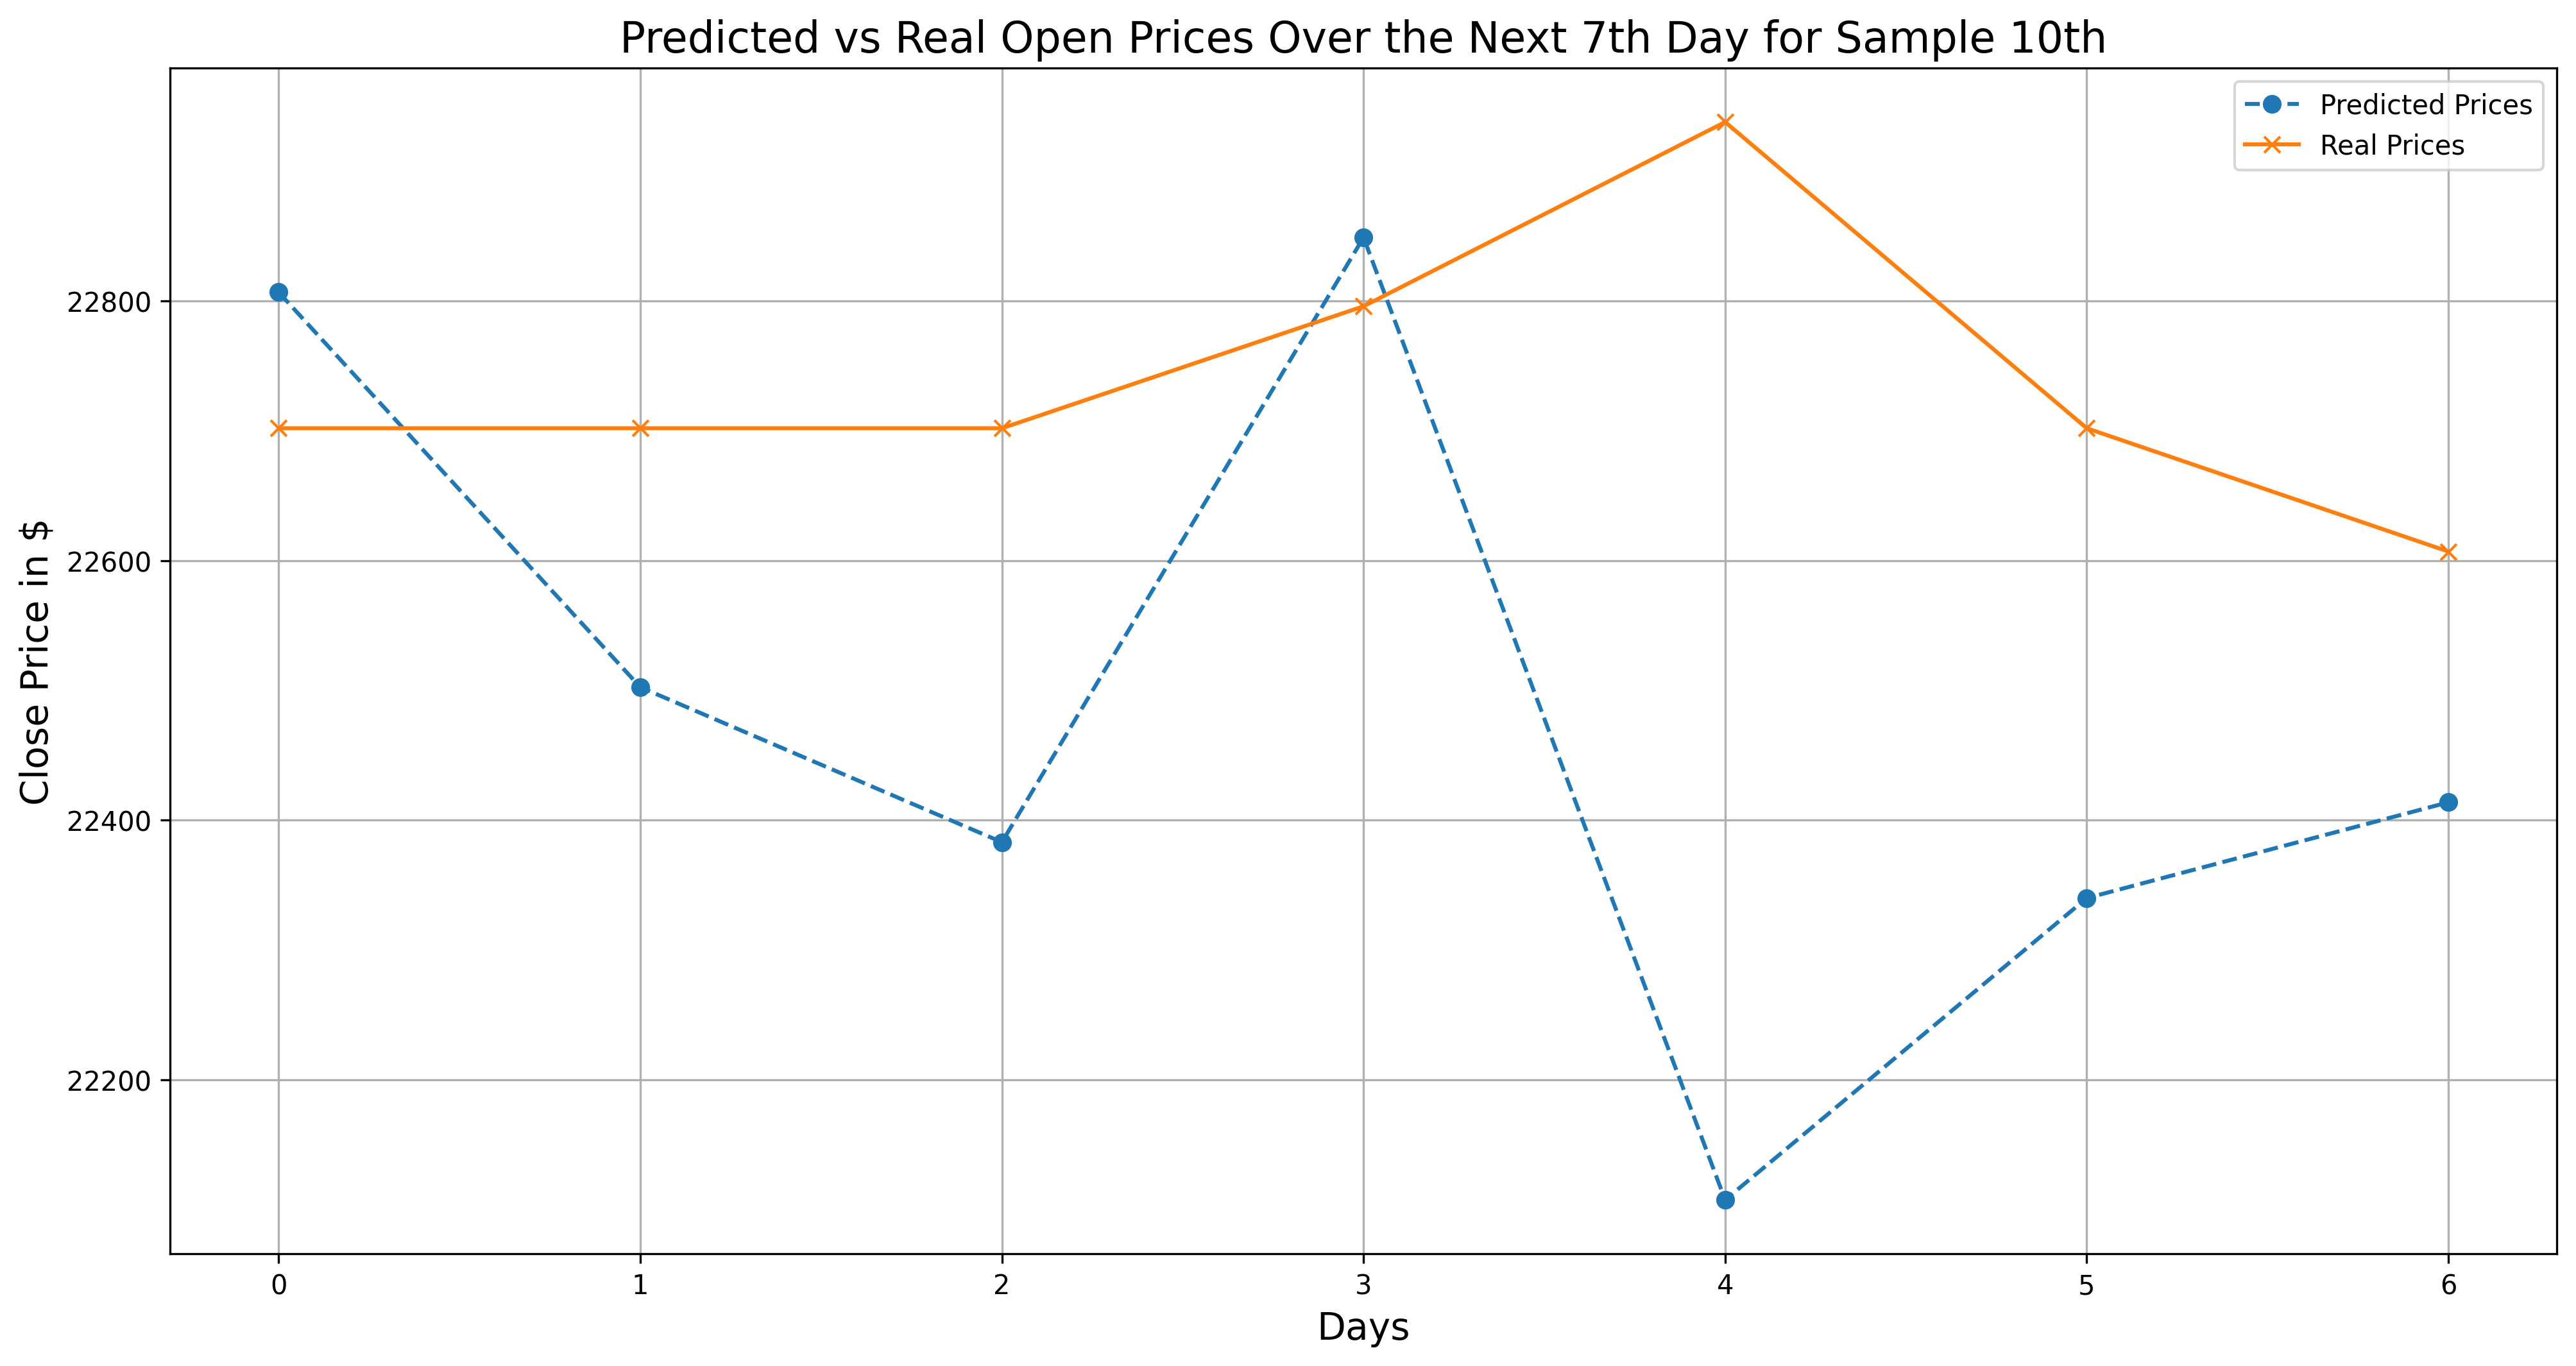

In [ ]:
plot_prediction(y_pred_denom_gru_ts, y_test, "GRU")
plot_prediction_timestep(y_pred_denom_gru_ts, y_test, "GRU")

In [ ]:
stop here if only want to train with time series split

# normal train

In [ ]:
splited_sets = pp.split_data(X_data, y_data)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [ ]:
y_train.shape

(2655, 7)

In [ ]:
y_train

array([[ 6973.,  7242.,  7142., ...,  7119.,  7157.,  7395.],
       [ 7242.,  7142.,  7142., ...,  7157.,  7395.,  7226.],
       [ 7142.,  7142.,  7119., ...,  7395.,  7226.,  7157.],
       ...,
       [33009., 34732., 32776., ..., 32161., 32161., 31735.],
       [34732., 32776., 31877., ..., 32161., 31735., 33911.],
       [32776., 31877., 32161., ..., 31735., 33911., 34620.]])

In [ ]:
# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
X_test = X_test.reshape(X_test.shape[0], window_size, num_features)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)

Shape of training set:  (2655, 30, 5)
Shape of validation set:  (664, 30, 5)
Shape of test set:  (830, 30, 5)

Shape of training set:  (2655, 7)
Shape of validation set:  (664, 7)
Shape of test set:  (830, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (2655, 30, 5)
Shape of scaled validation set:  (664, 30, 5)
Shape of scaled test set:  (830, 30, 5)

Shape of scales training label  (2655, 7)
Shape of scales validation label  (664, 7)
Shape of scales test label  (830, 7)


## train

In [ ]:
# Compile and train GRU
optimizer = Nadam(learning_rate=0.01)
compile(model_gru, optimizer)
callbacks = get_callbacks(file_path='model_gru.keras')
history_gru = train_history(model_gru, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 942ms/step - loss: 0.1327 - mae: 0.3193 - val_loss: 0.0550 - val_mae: 0.1900 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - loss: 0.0330 - mae: 0.1493 - val_loss: 0.0634 - val_mae: 0.2004 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - loss: 0.0163 - mae: 0.1043 - val_loss: 0.0379 - val_mae: 0.1508 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - loss: 0.0136 - mae: 0.0989 - val_loss: 0.0258 - val_mae: 0.1198 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - loss: 0.0134 - mae: 0.1003 - val_loss: 0.0233 - val_mae: 0.1144 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - loss: 0.0099 - mae: 0.0853 - val_loss: 0.0224 - val_mae: 0.1117 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - loss: 0.0070 - mae: 0.0697 - val_loss: 0.0139 - val_mae: 0.0865 - learning_rate: 0.0100
Epoch 8/40
2/2 ━━━━━

In [ ]:
# Compile and train LSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_lstm, optimizer)
callbacks = get_callbacks(file_path='model_lstm.keras')
history_lstm = train_history(model_lstm, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step - loss: 0.0020 - mae: 0.0333 - val_loss: 0.0021 - val_mae: 0.0343 - learning_rate: 0.0100
Epoch 31/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0023 - val_mae: 0.0356 - learning_rate: 0.0050
Epoch 32/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.0018 - mae: 0.0318 - val_loss: 0.0024 - val_mae: 0.0369 - learning_rate: 0.0050
Epoch 33/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - loss: 0.0018 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0359 - learning_rate: 0.0050
Epoch 34/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - loss: 0.0018 - mae: 0.0318 - val_loss: 0.0022 - val_mae: 0.0354 - learning_rate: 0.0025
Epoch 35/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - loss: 0.0017 - mae: 0.0309 - val_loss: 0.0021 - val_mae: 0.0343 - learning_rate: 0.0025
Epoch 36/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - loss: 0.0018 - mae: 0.0313 - val_loss: 0.0021 - val_mae: 0.0350 - learning_rate: 0.0025
Epoch 37/40
2/2 ━━━━━━━━━

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bilstm, optimizer)
callbacks = get_callbacks(file_path='model_bilstm.keras')
history_bilstm = train_history(model_bilstm, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 809ms/step - loss: 0.1136 - mae: 0.2965 - val_loss: 0.5656 - val_mae: 0.7270 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - loss: 0.1198 - mae: 0.3028 - val_loss: 0.1177 - val_mae: 0.3035 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - loss: 0.0188 - mae: 0.1045 - val_loss: 0.2848 - val_mae: 0.5102 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - loss: 0.0482 - mae: 0.1791 - val_loss: 0.0524 - val_mae: 0.1874 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - loss: 0.0105 - mae: 0.0822 - val_loss: 0.0402 - val_mae: 0.1621 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - loss: 0.0085 - mae: 0.0737 - val_loss: 0.0273 - val_mae: 0.1282 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - loss: 0.0075 - mae: 0.0697 - val_loss: 0.0147 - val_mae: 0.0893 - learning_rate: 0.0100
Epoch 8/40
2/2 ━━━━━

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bigru, optimizer)
callbacks = get_callbacks(file_path='model_bigru.keras')
history_bigru = train_history(model_bigru, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 937ms/step - loss: 0.1024 - mae: 0.2729 - val_loss: 0.3657 - val_mae: 0.5764 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 988ms/step - loss: 0.0741 - mae: 0.2276 - val_loss: 0.0345 - val_mae: 0.1467 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - loss: 0.0114 - mae: 0.0852 - val_loss: 0.0467 - val_mae: 0.1760 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - loss: 0.0095 - mae: 0.0750 - val_loss: 0.1151 - val_mae: 0.3235 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - loss: 0.0223 - mae: 0.1241 - val_loss: 0.0679 - val_mae: 0.2445 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 812ms/step - loss: 0.0111 - mae: 0.0810 - val_loss: 0.0120 - val_mae: 0.0862 - learning_rate: 0.0050
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0041 - mae: 0.0491 - val_loss: 0.0089 - val_mae: 0.0710 - learning_rate: 0.0050
Epoch 8/40
2/2 ━━━━━━━━

##plot performance

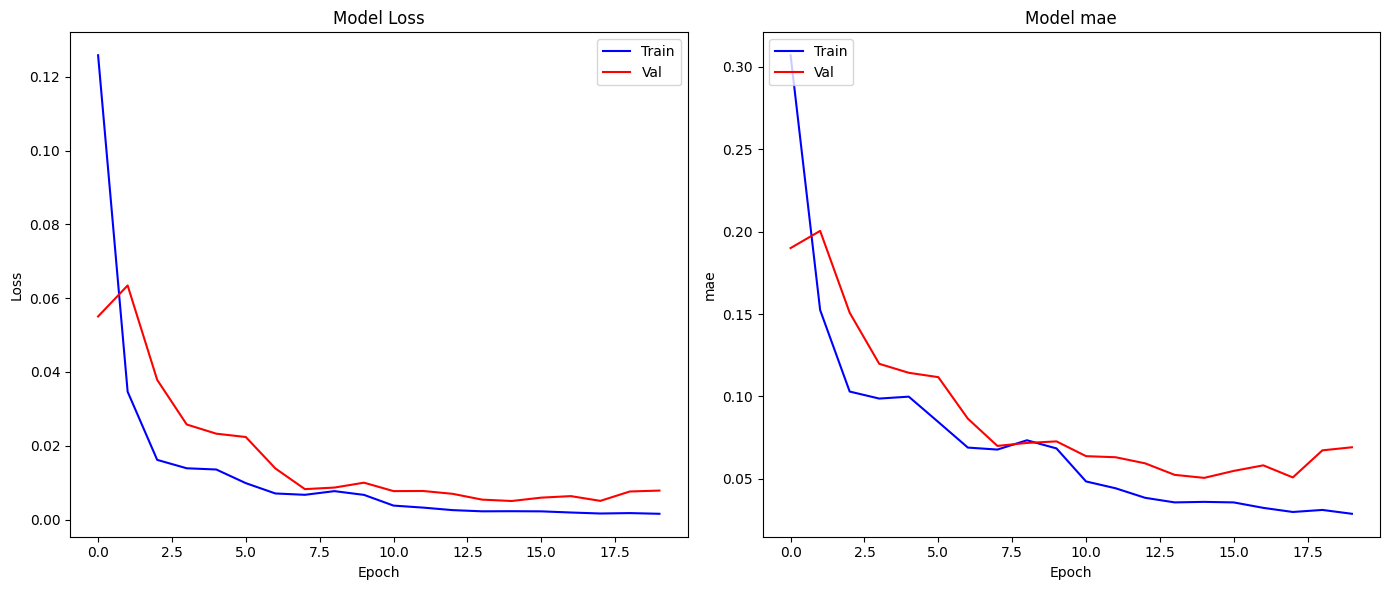

In [ ]:
plot_performance(history_gru)

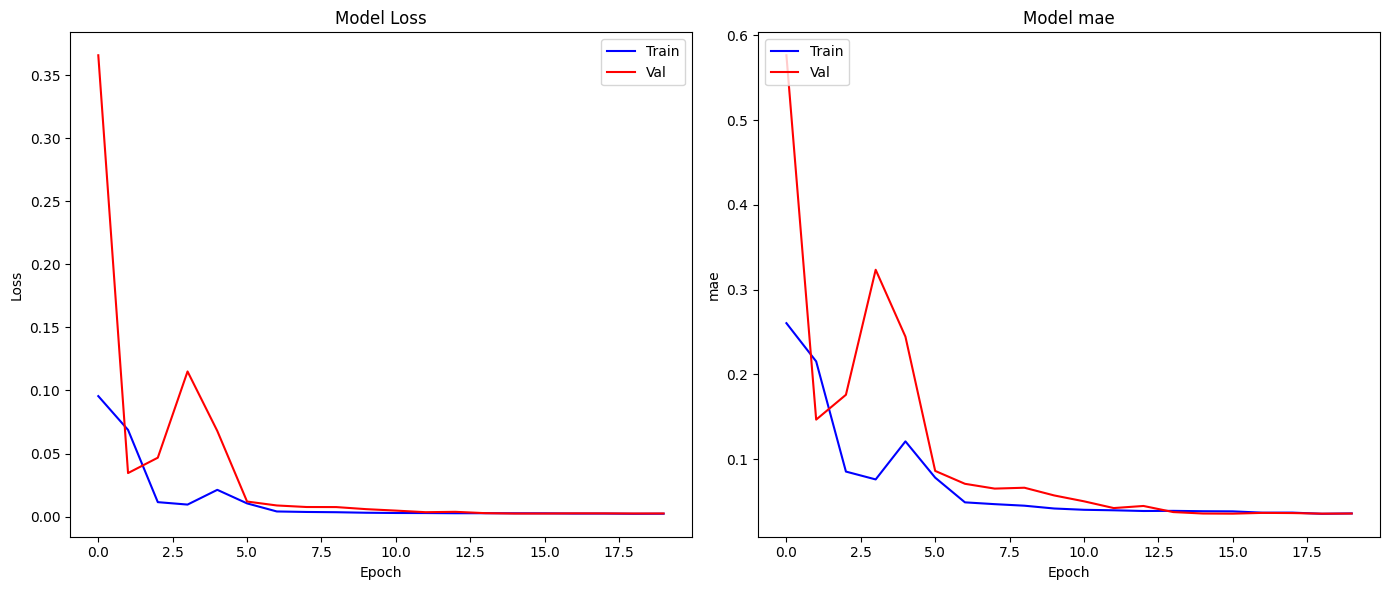

In [ ]:
plot_performance(history_bigru)
plot_performance(history_gru)

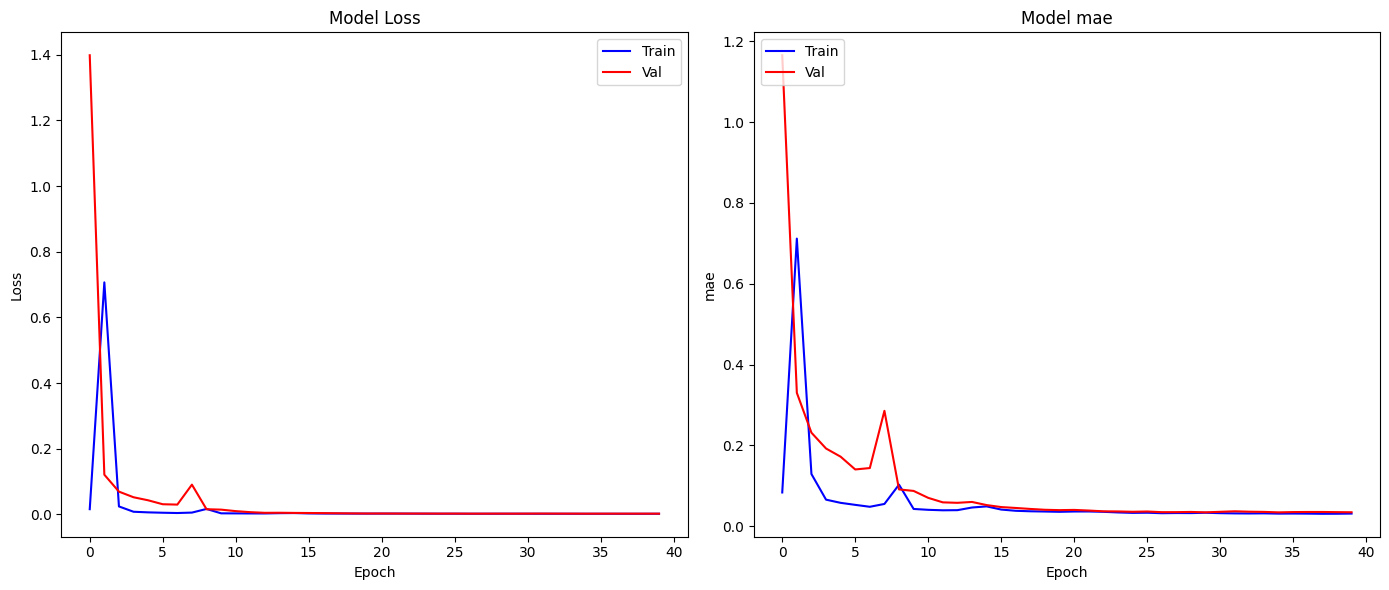

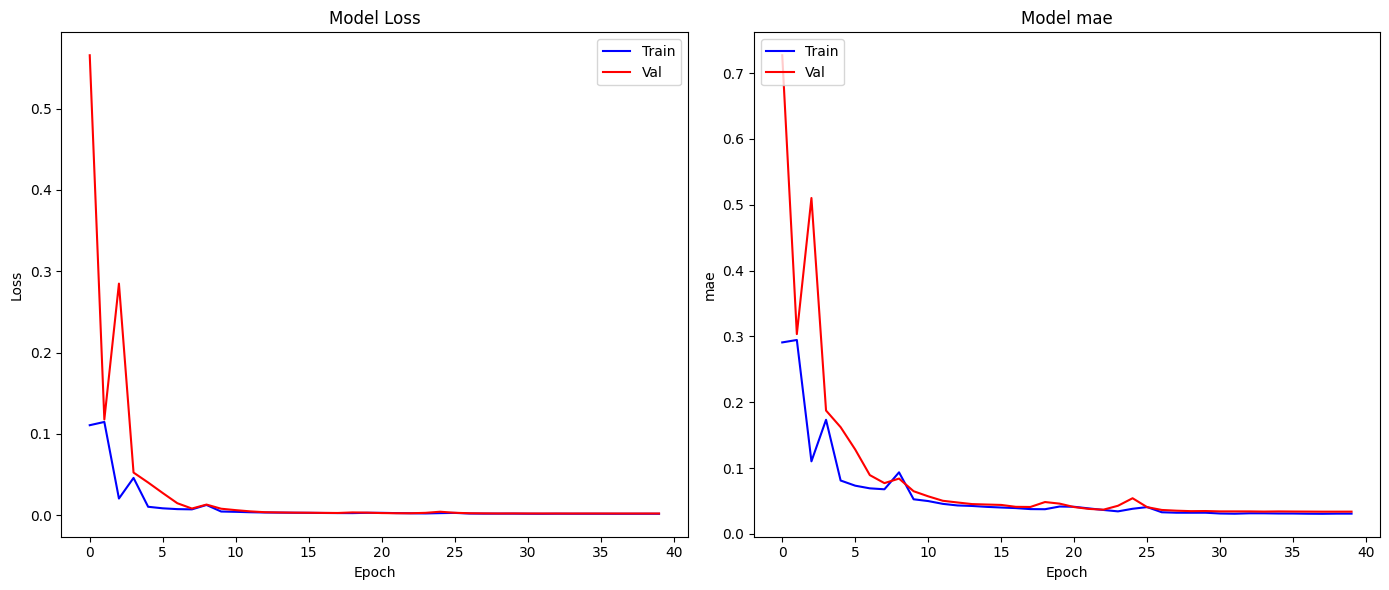

In [ ]:
plot_performance(history_lstm)
plot_performance(history_bilstm)

## Evaluation

In [ ]:
print("=========GRU===========")
model_gru = get_model_n_evaluate("/content/model_gru.keras", X_test_norm, y_test_norm)
y_pred_denorm_gru = get_reverse_prediction(model_gru, X_test_norm, y_scaler)
print()

=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mae: 0.0359
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.00898013450205326, mae = 0.05271290987730026
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
MSE on the test set:  0.008980135757938624
Shape of denormalized training set:  (830, 7)



In [ ]:
print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)
print()

=========BiGRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mae: 0.0365
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.00875622034072876, mae = 0.055260319262742996
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
MSE on the test set:  0.008756220033810233
Shape of denormalized training set:  (830, 7)



In [ ]:
print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========LSTM===========")
model_lstm = get_model_n_evaluate("/content/model_lstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_lstm = get_reverse_prediction(model_lstm, X_test_norm, y_scaler)

=========BiLSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0046 - mae: 0.0359
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.009551270864903927, mae = 0.05569424107670784
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
MSE on the test set:  0.009551271447668206
Shape of denormalized training set:  (830, 7)

=========LSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mae: 0.0372
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.010025524534285069, mae = 0.05758122354745865
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MSE on the test set:  0.010025524578682226
Shape of denormalized training set:  (830, 7)


In [ ]:
print(y_test_norm.shape)
print(y_scaler.inverse_transform(y_test_norm).shape)

(830, 7)
(830, 7)


In [ ]:
#convo1d: 0.00047 0.0167
#lstm: 0.00036 0.014

## viz prediction

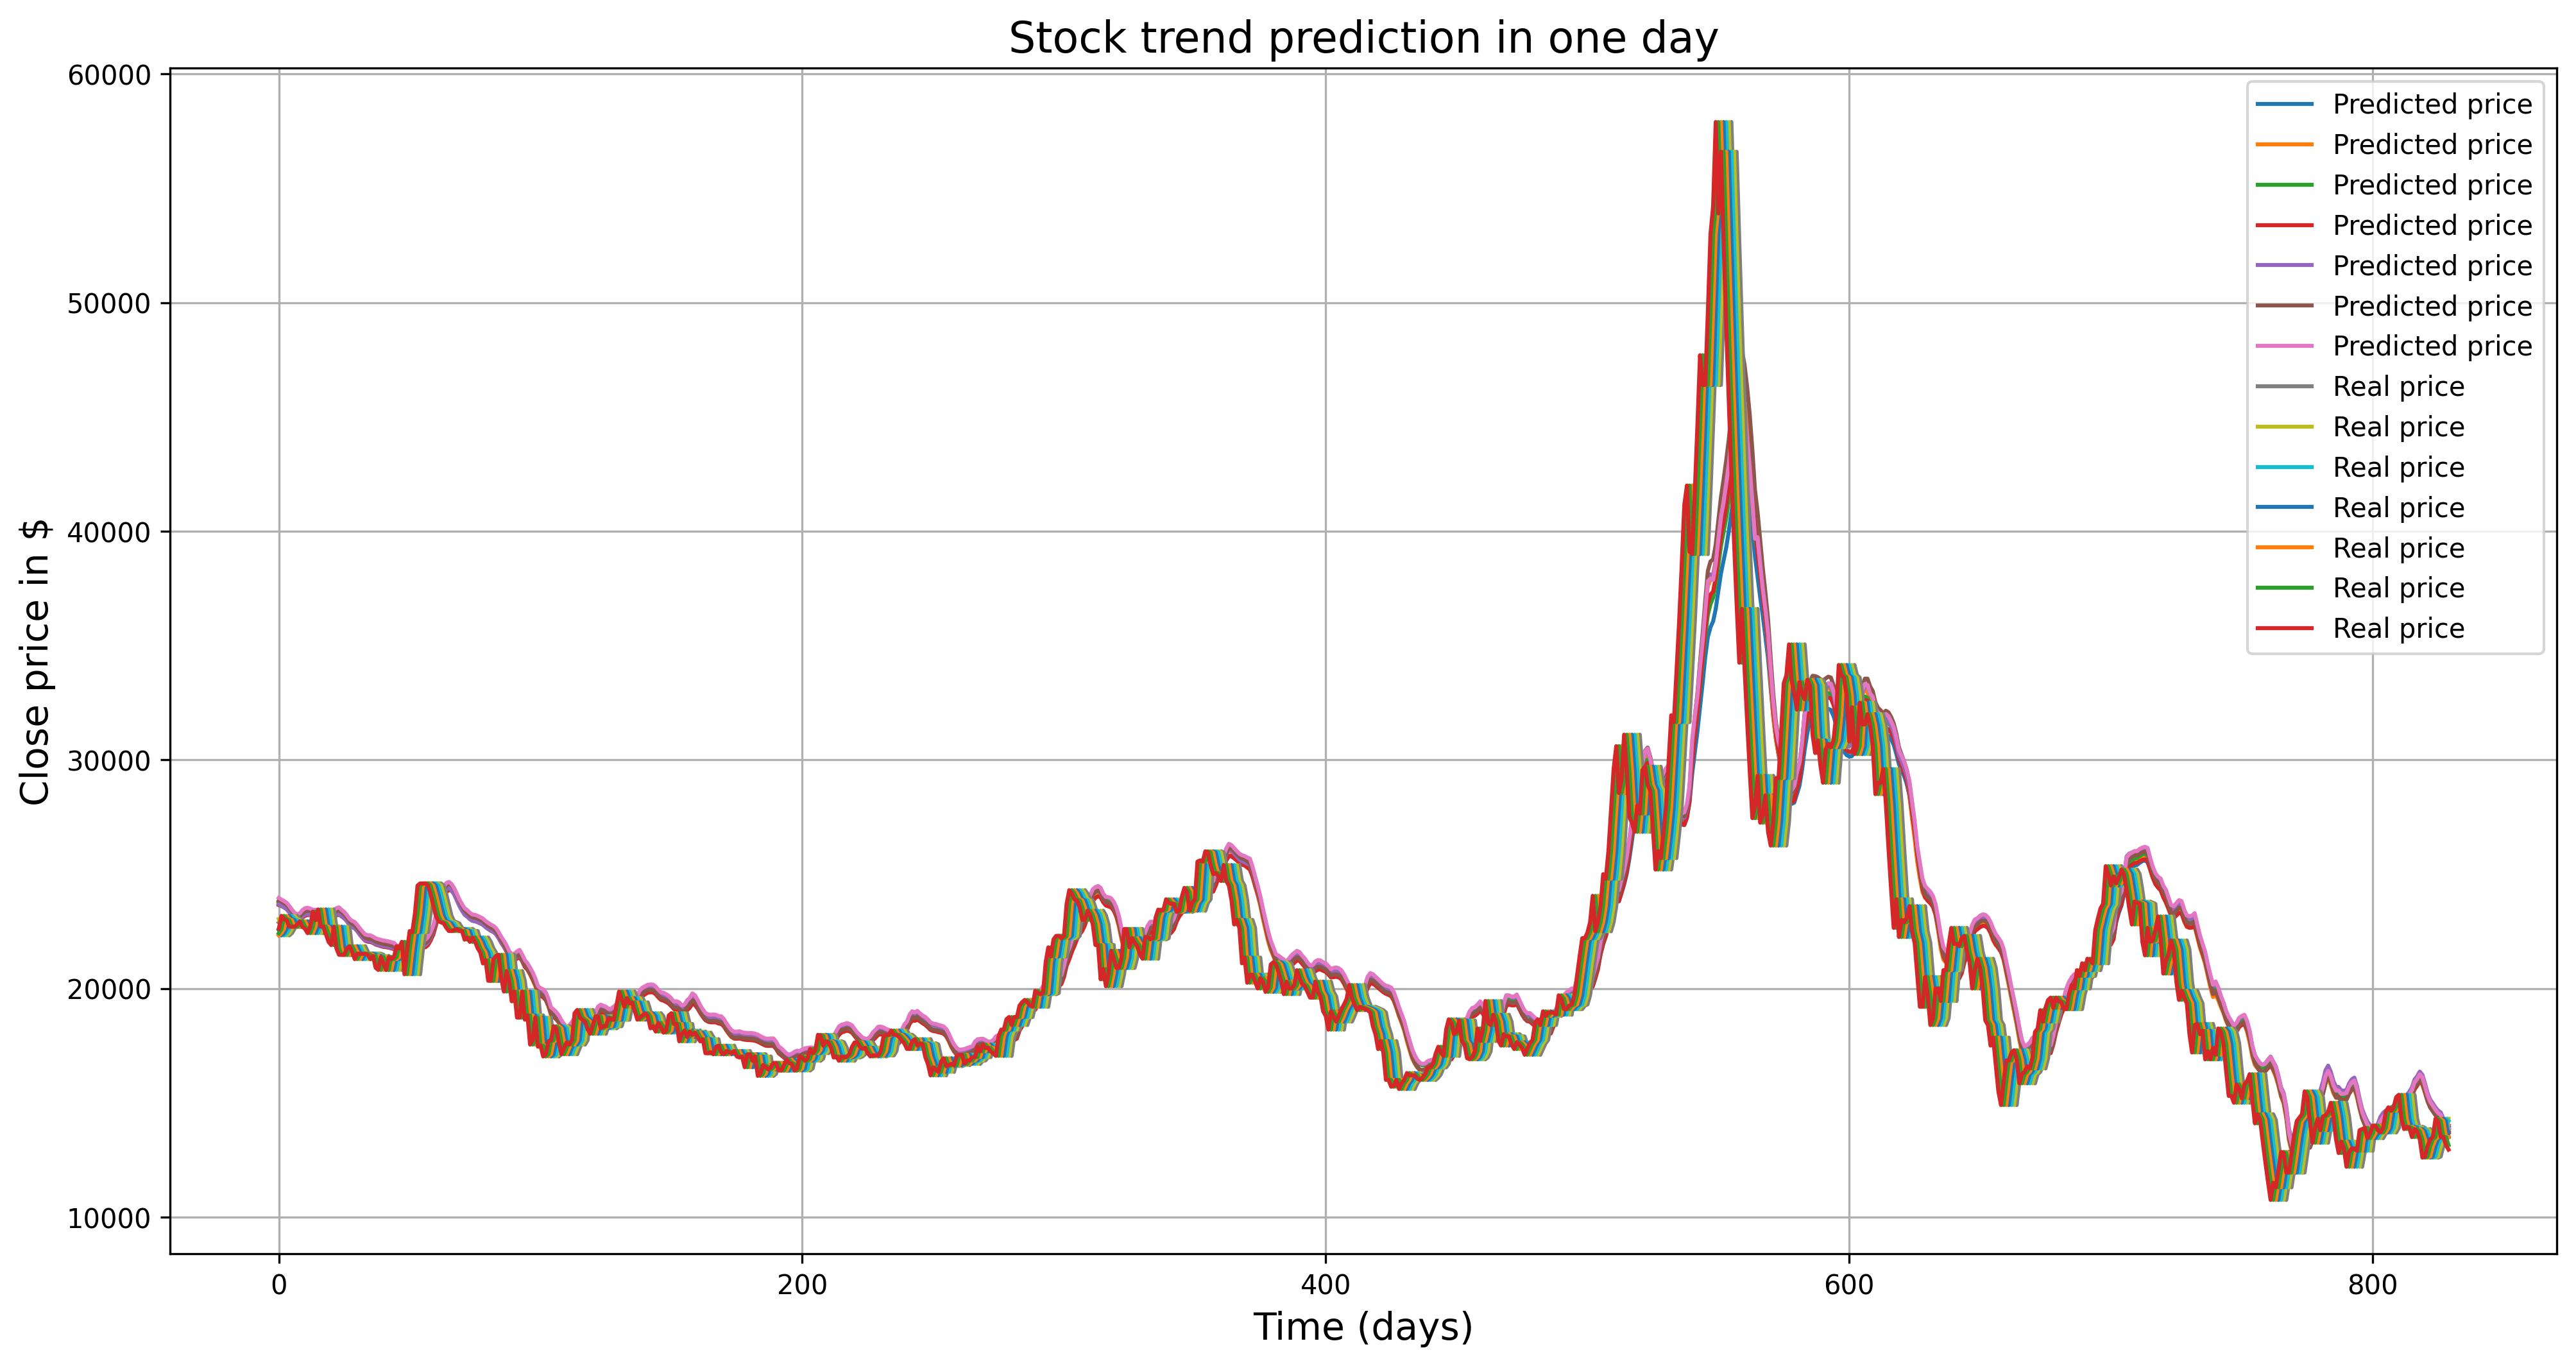

In [ ]:
plot_prediction(y_pred_denorm_gru, y_test, "GRU")

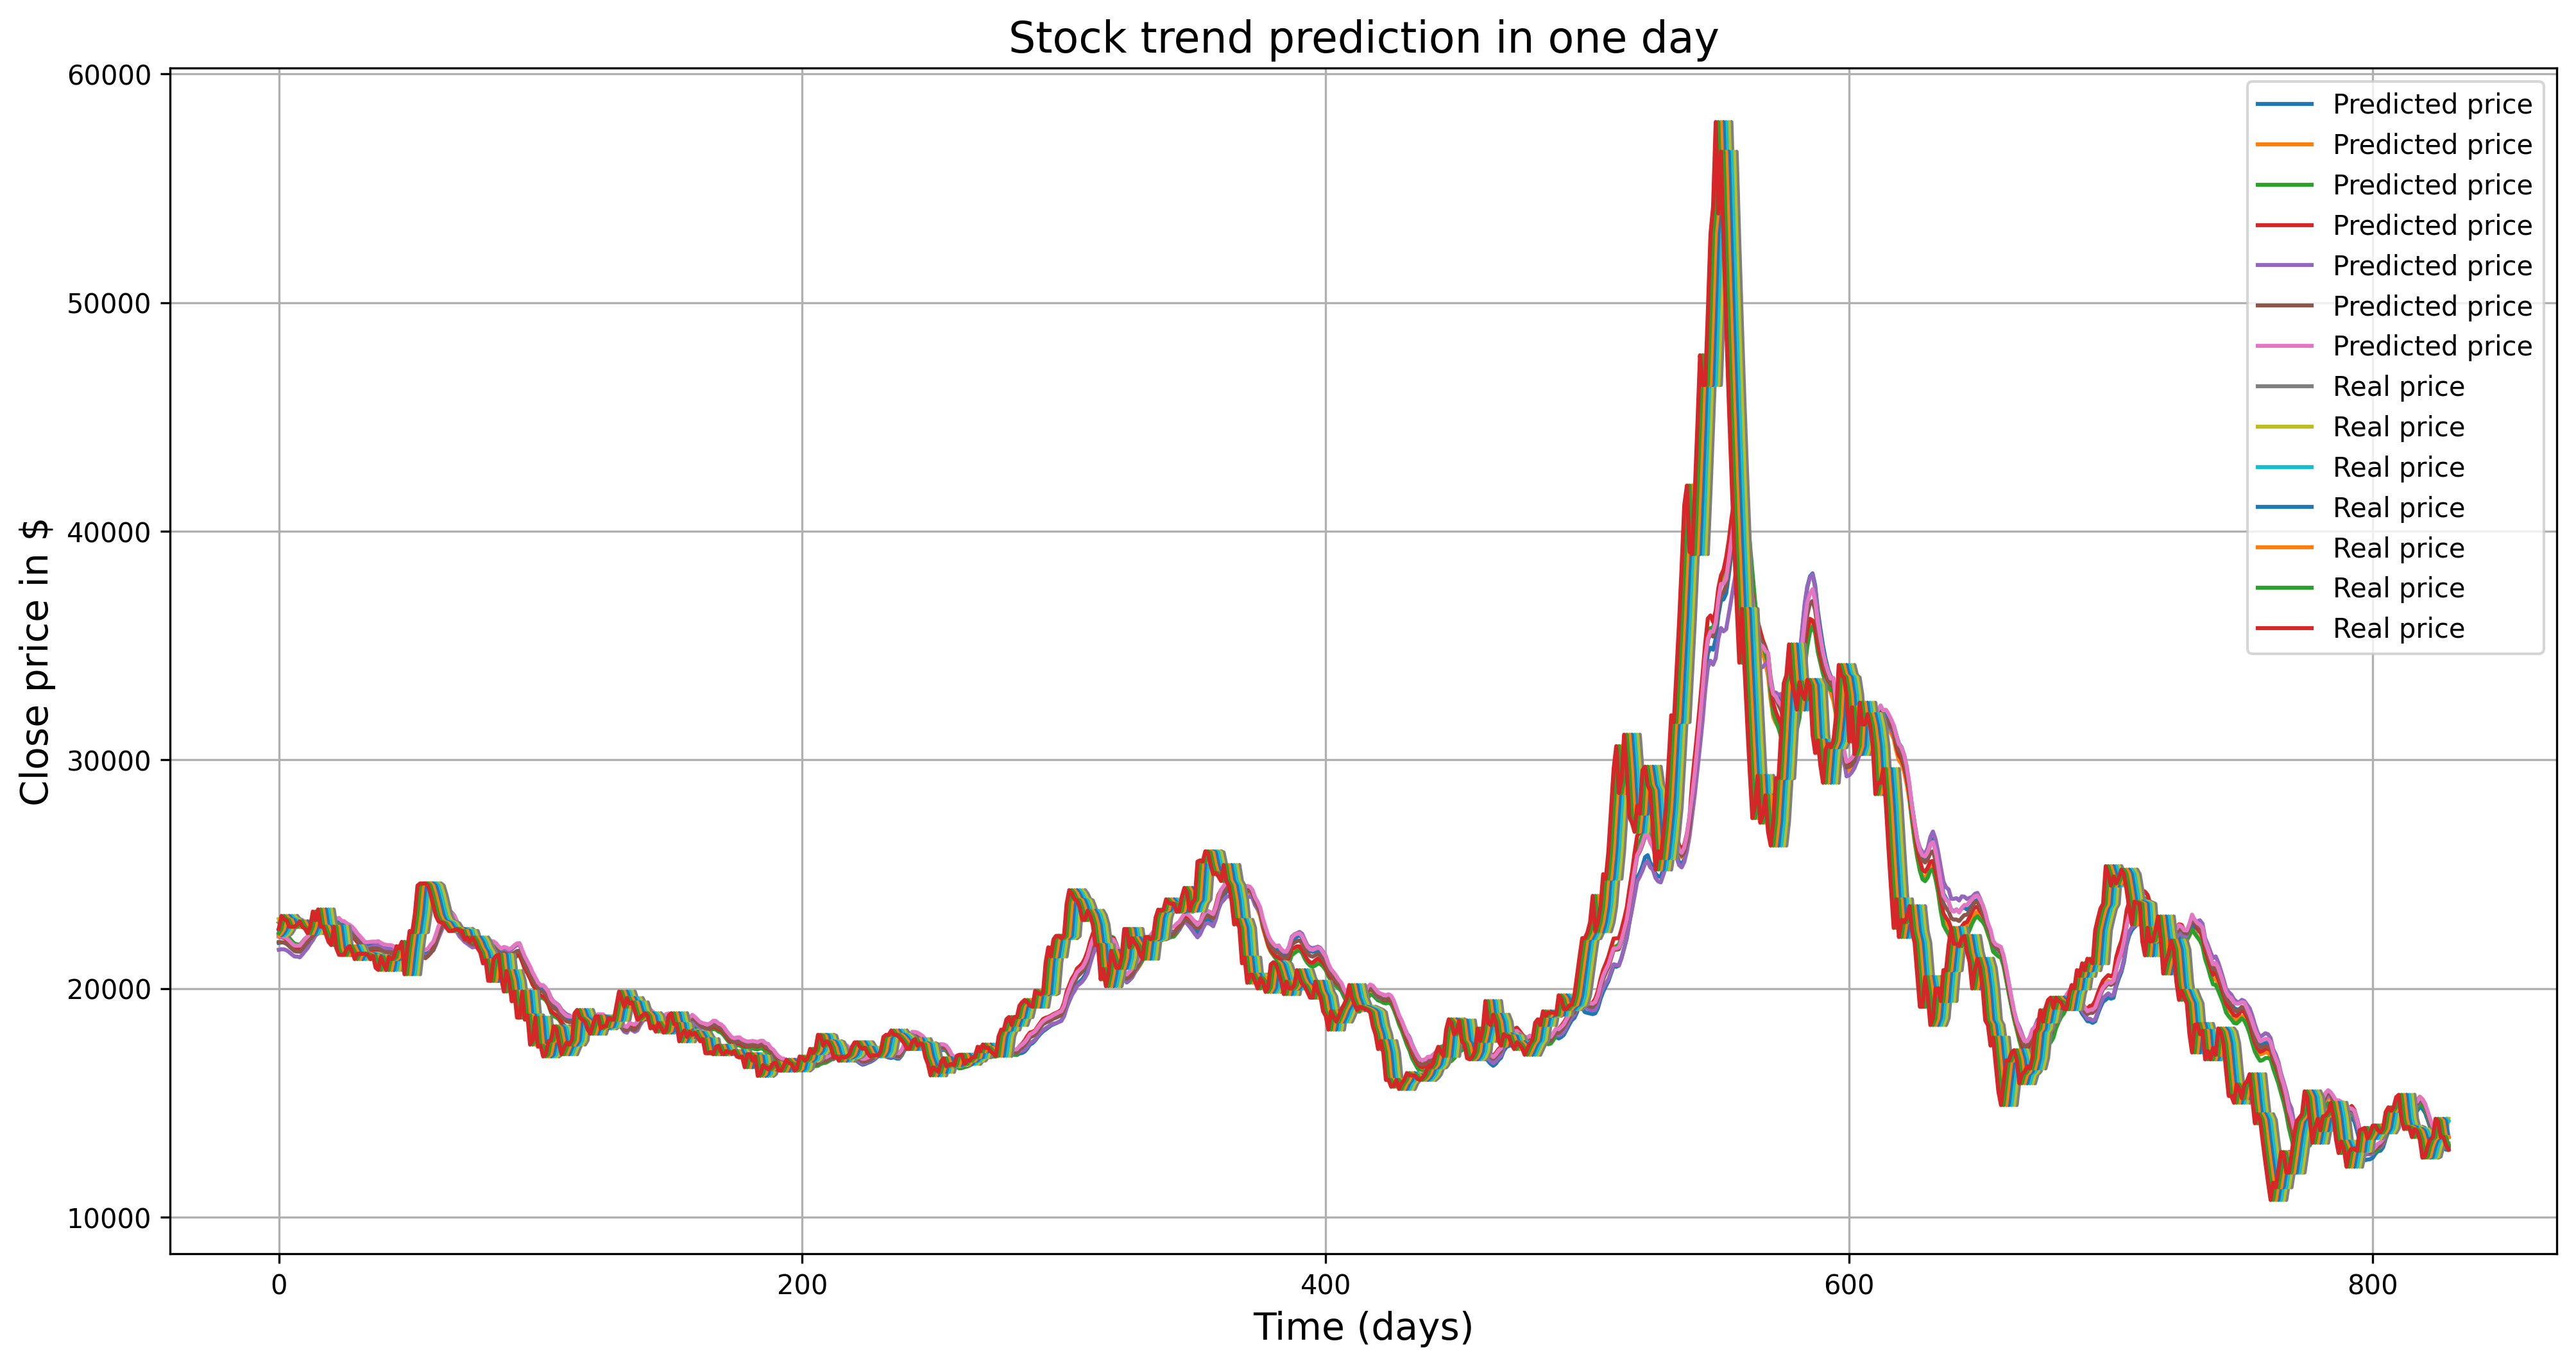

In [ ]:
plot_prediction(y_pred_denorm_bigru, y_test, "BiGRU")

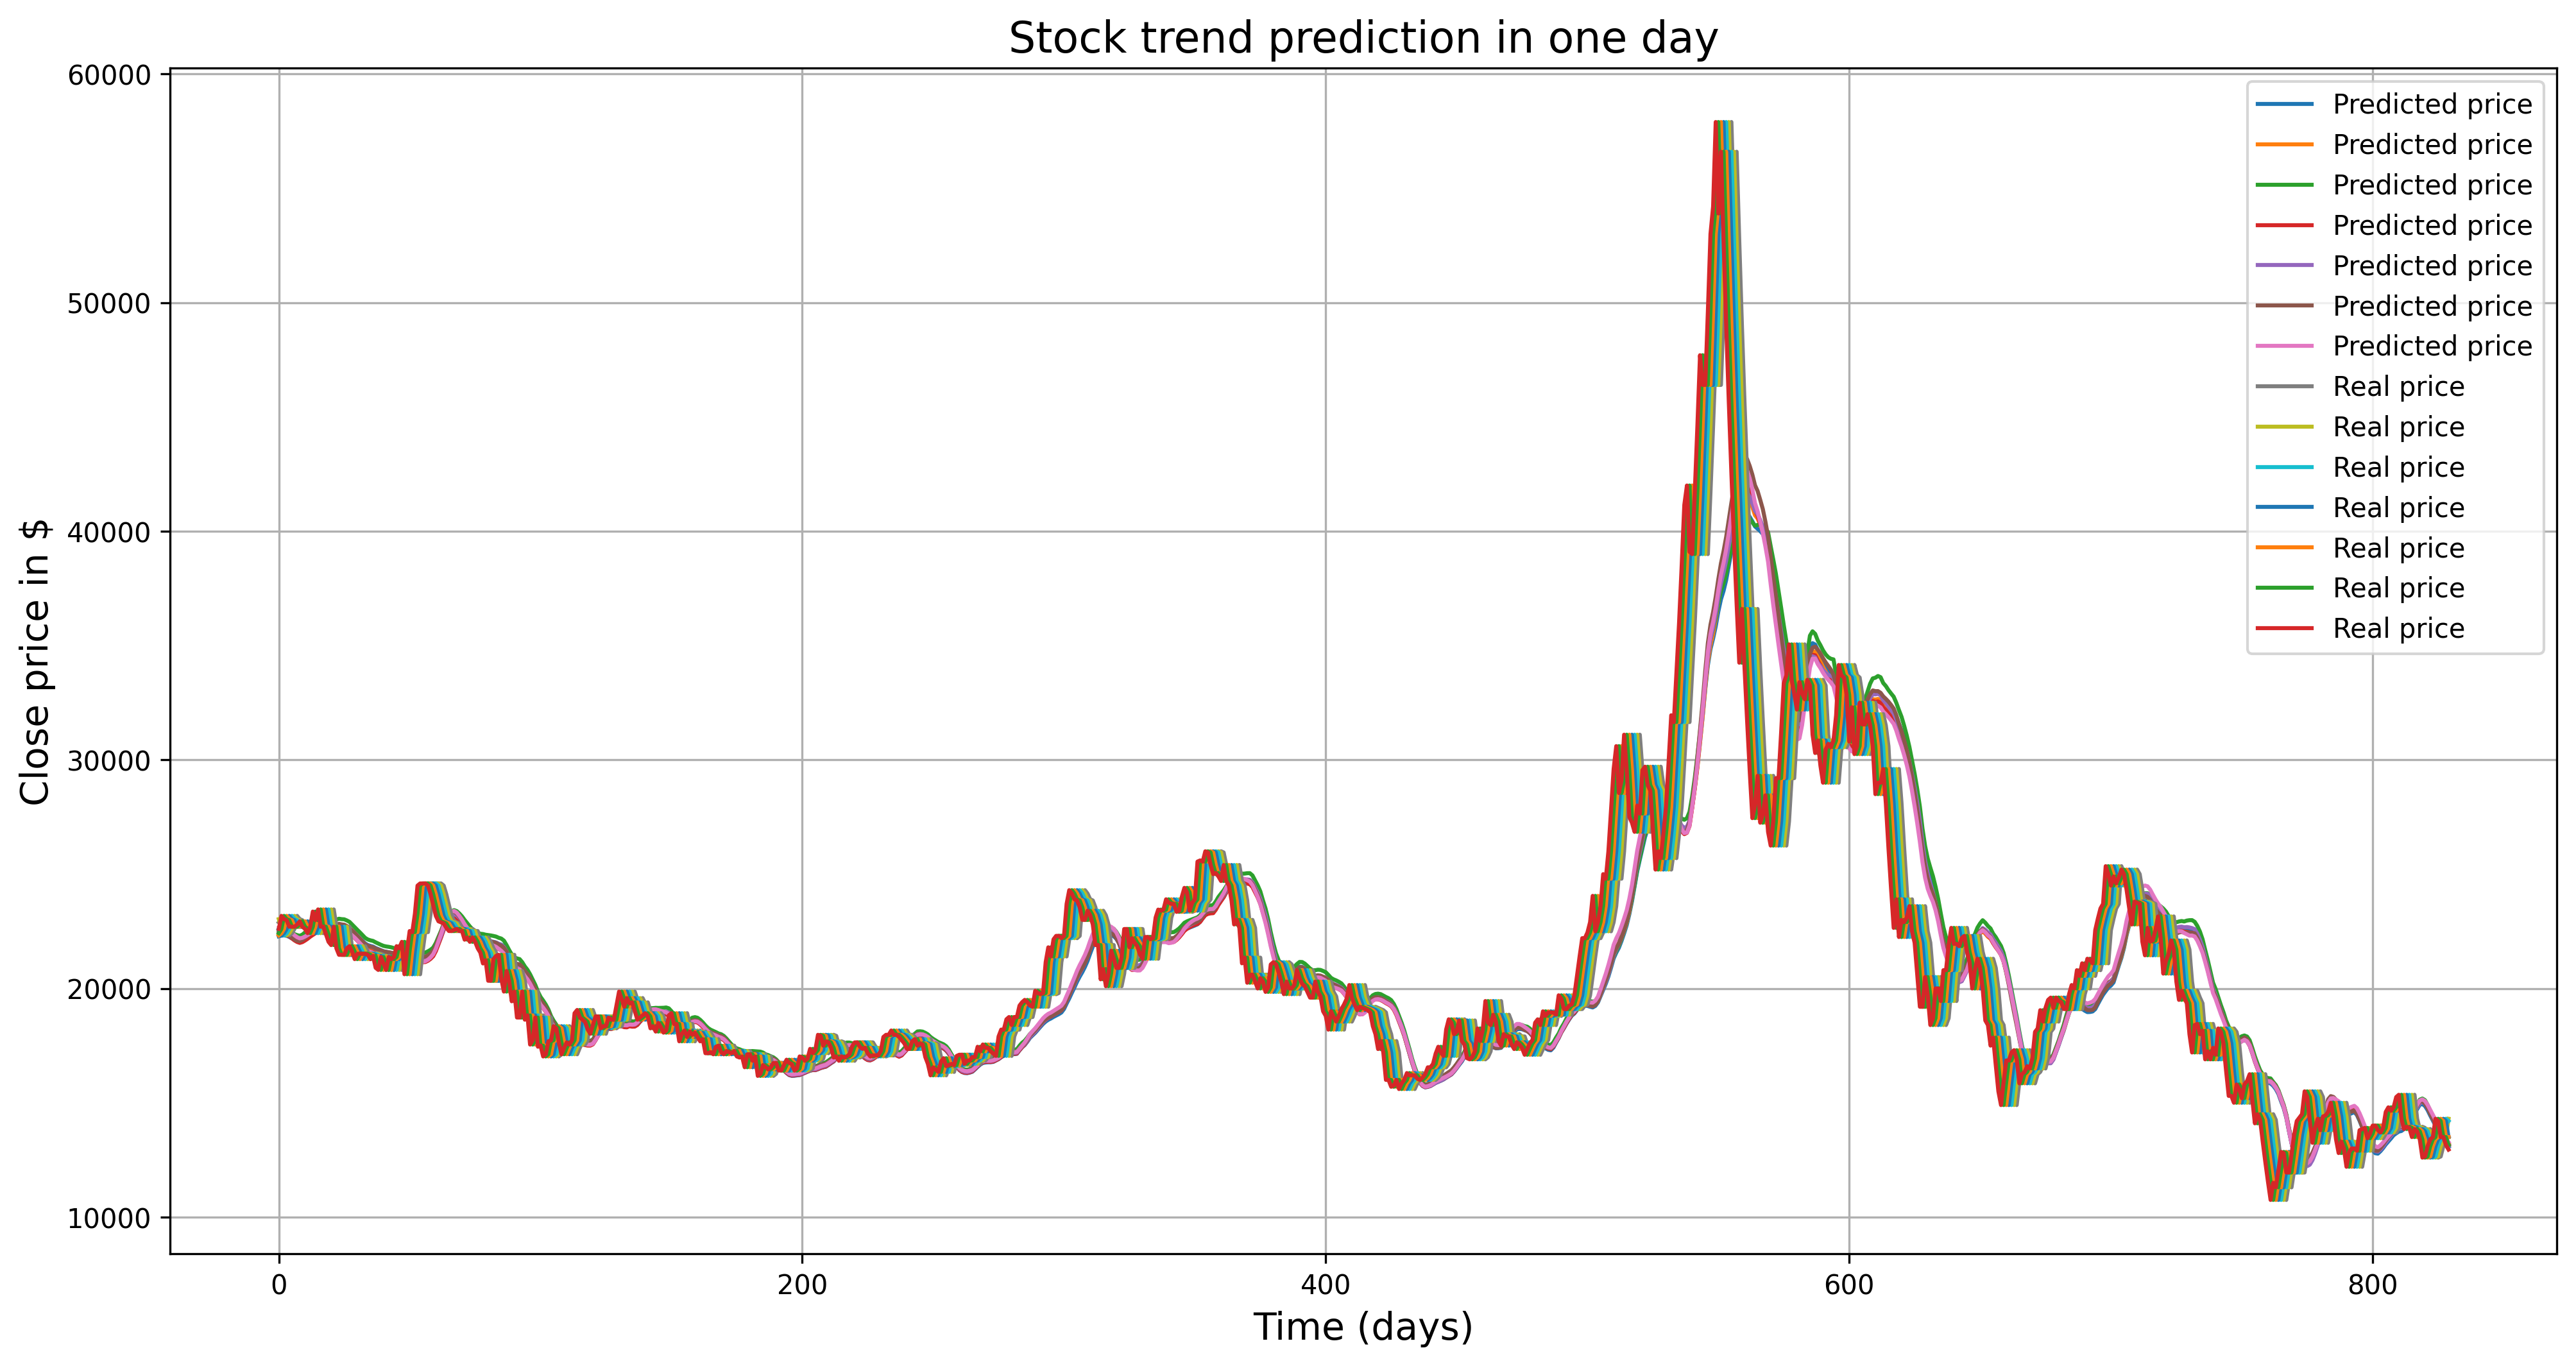

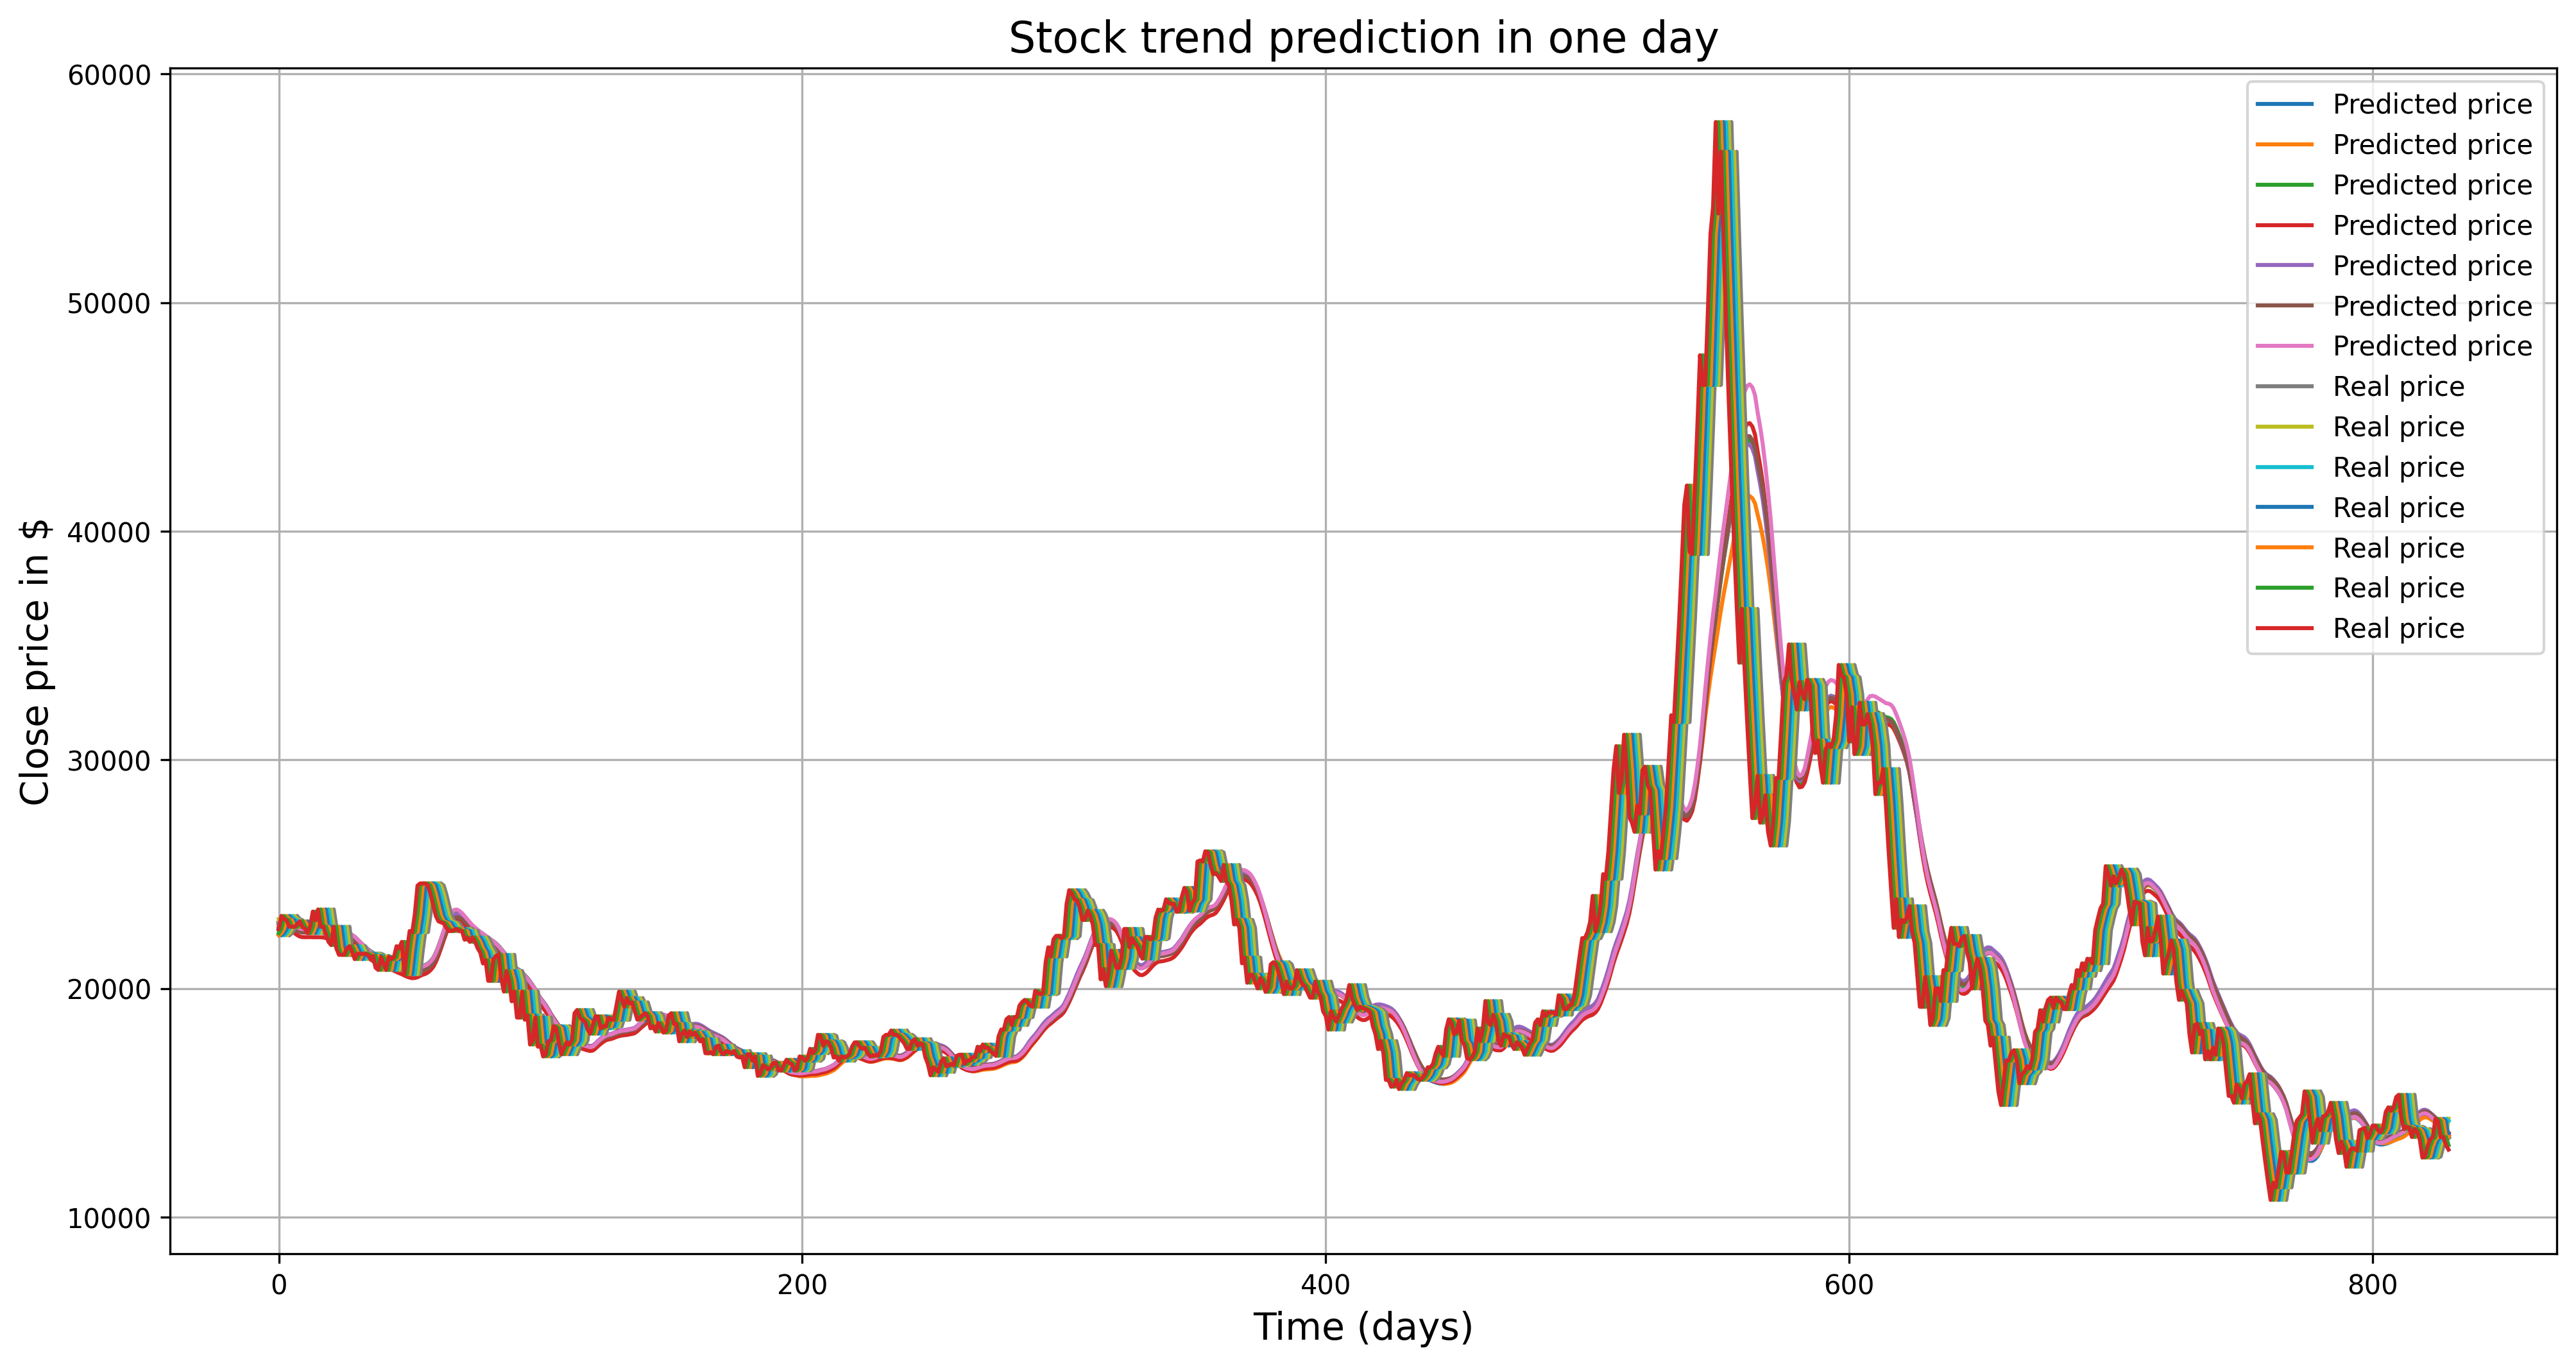

In [ ]:
plot_prediction(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denorm_lstm, y_test, "LSTM")

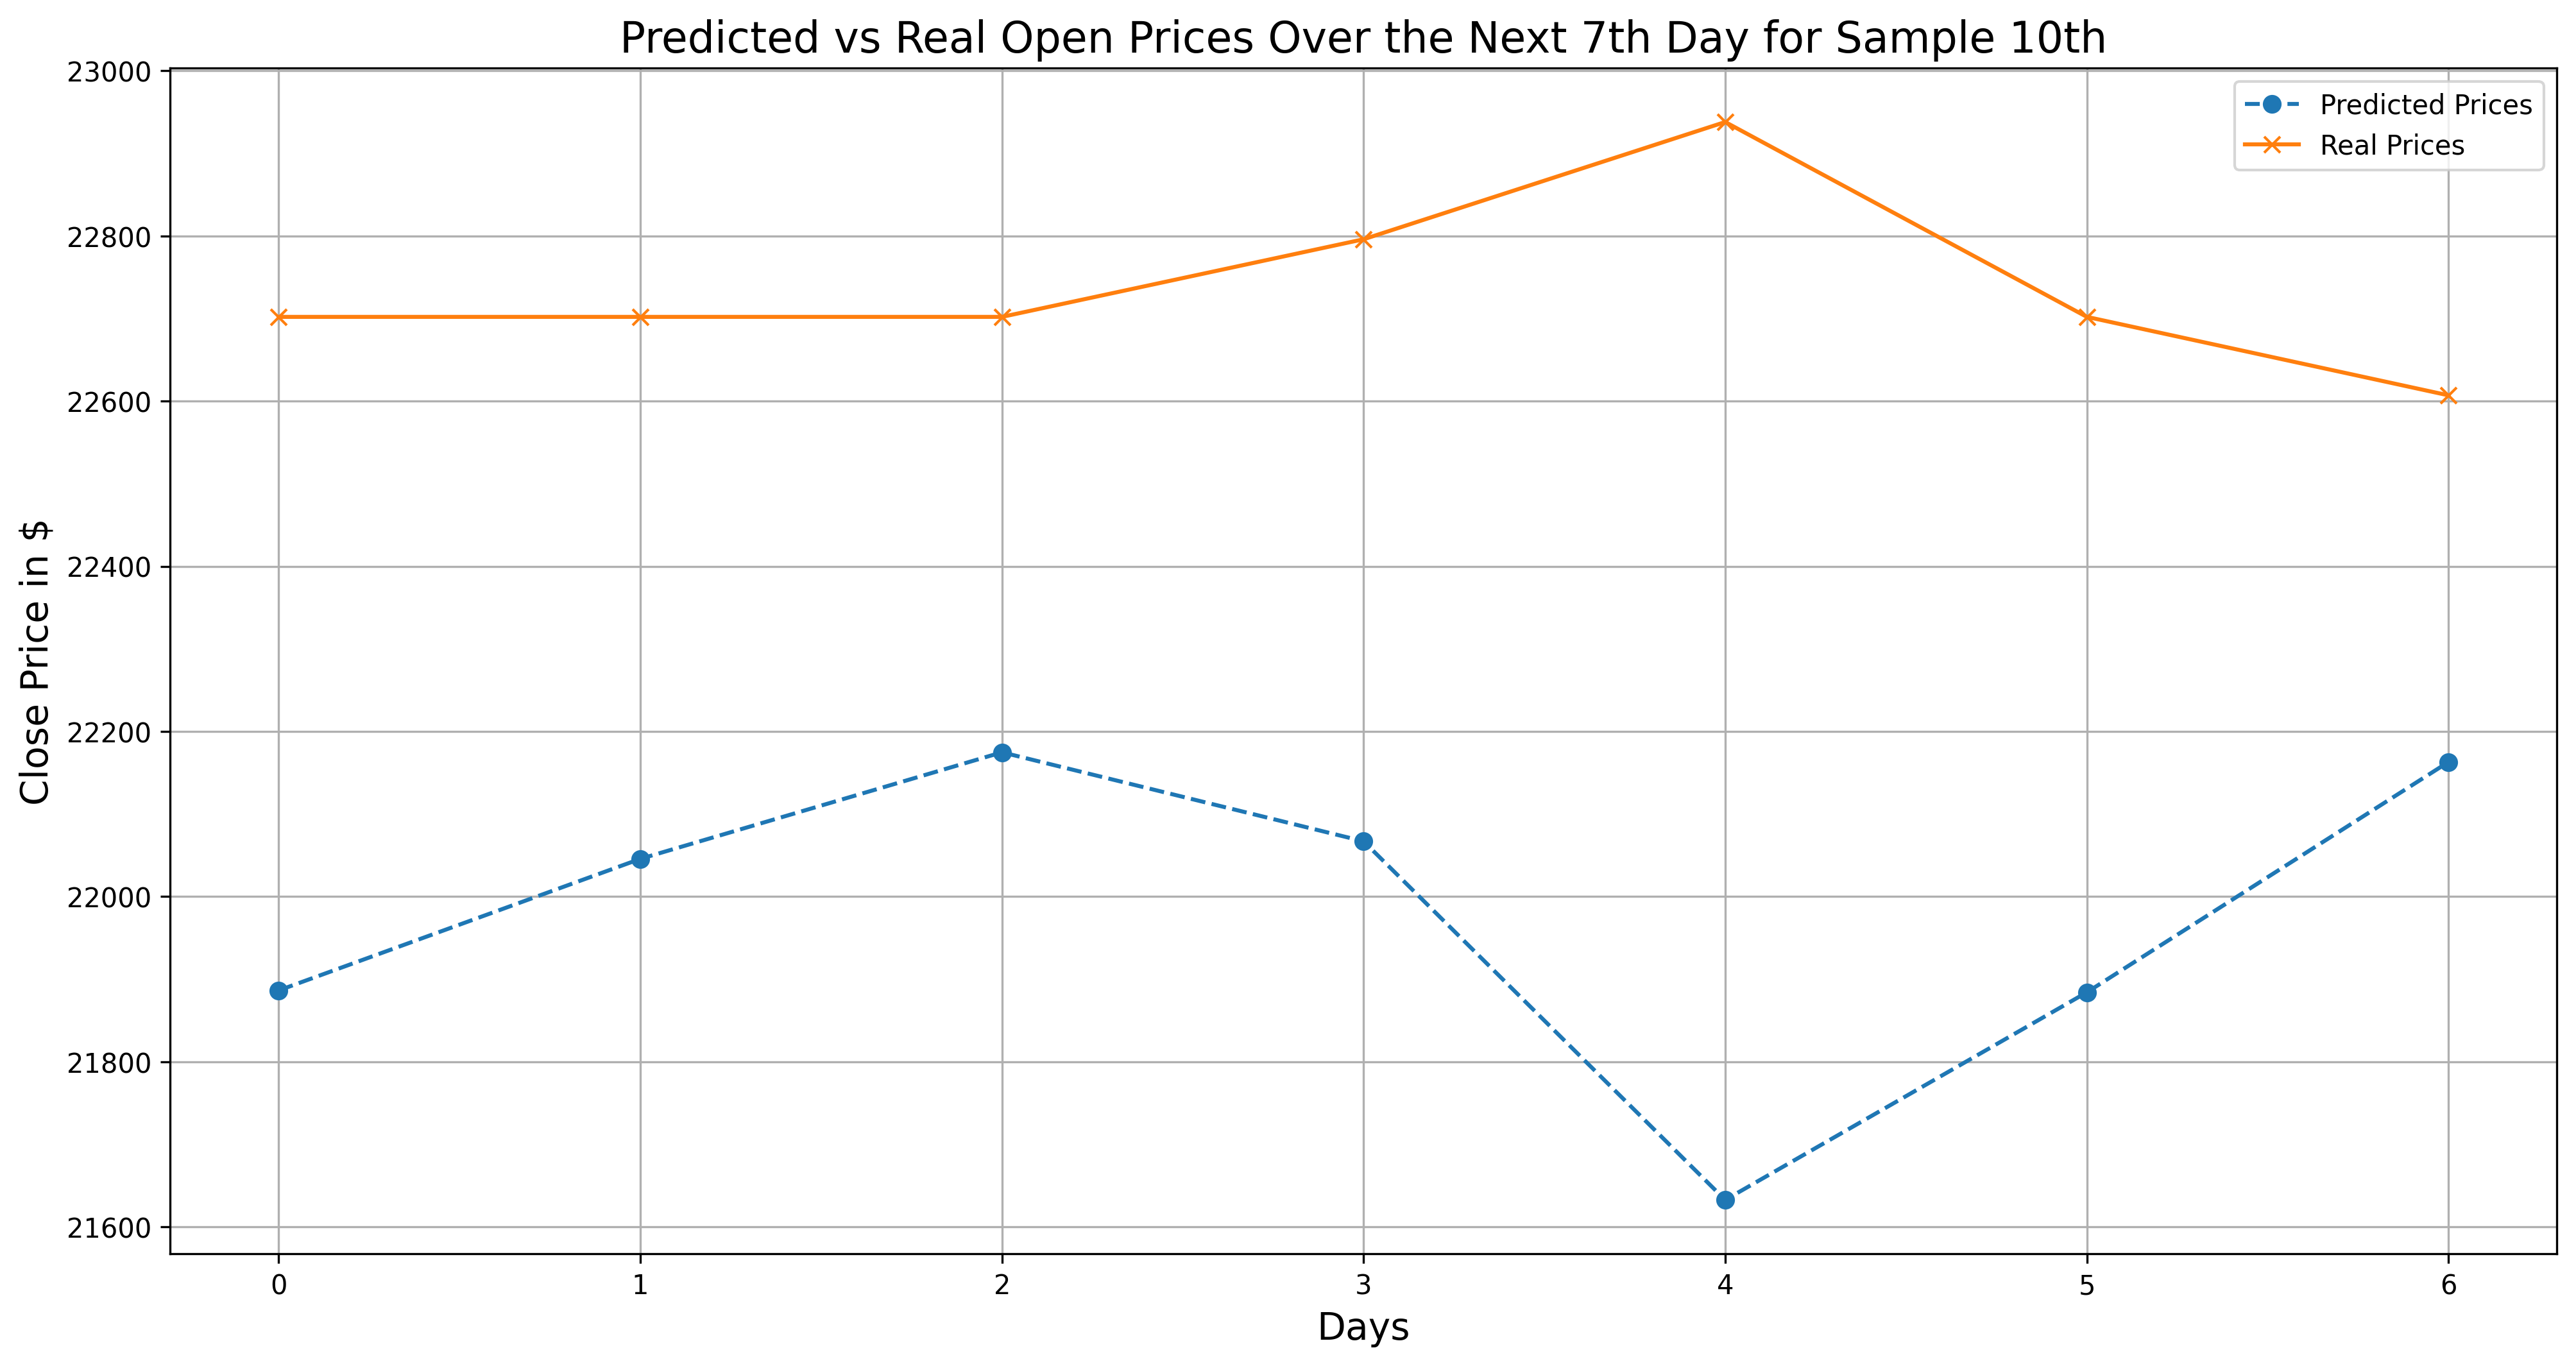

In [ ]:
plot_prediction_timestep(y_pred_denorm_bigru, y_test, "BiGRU")

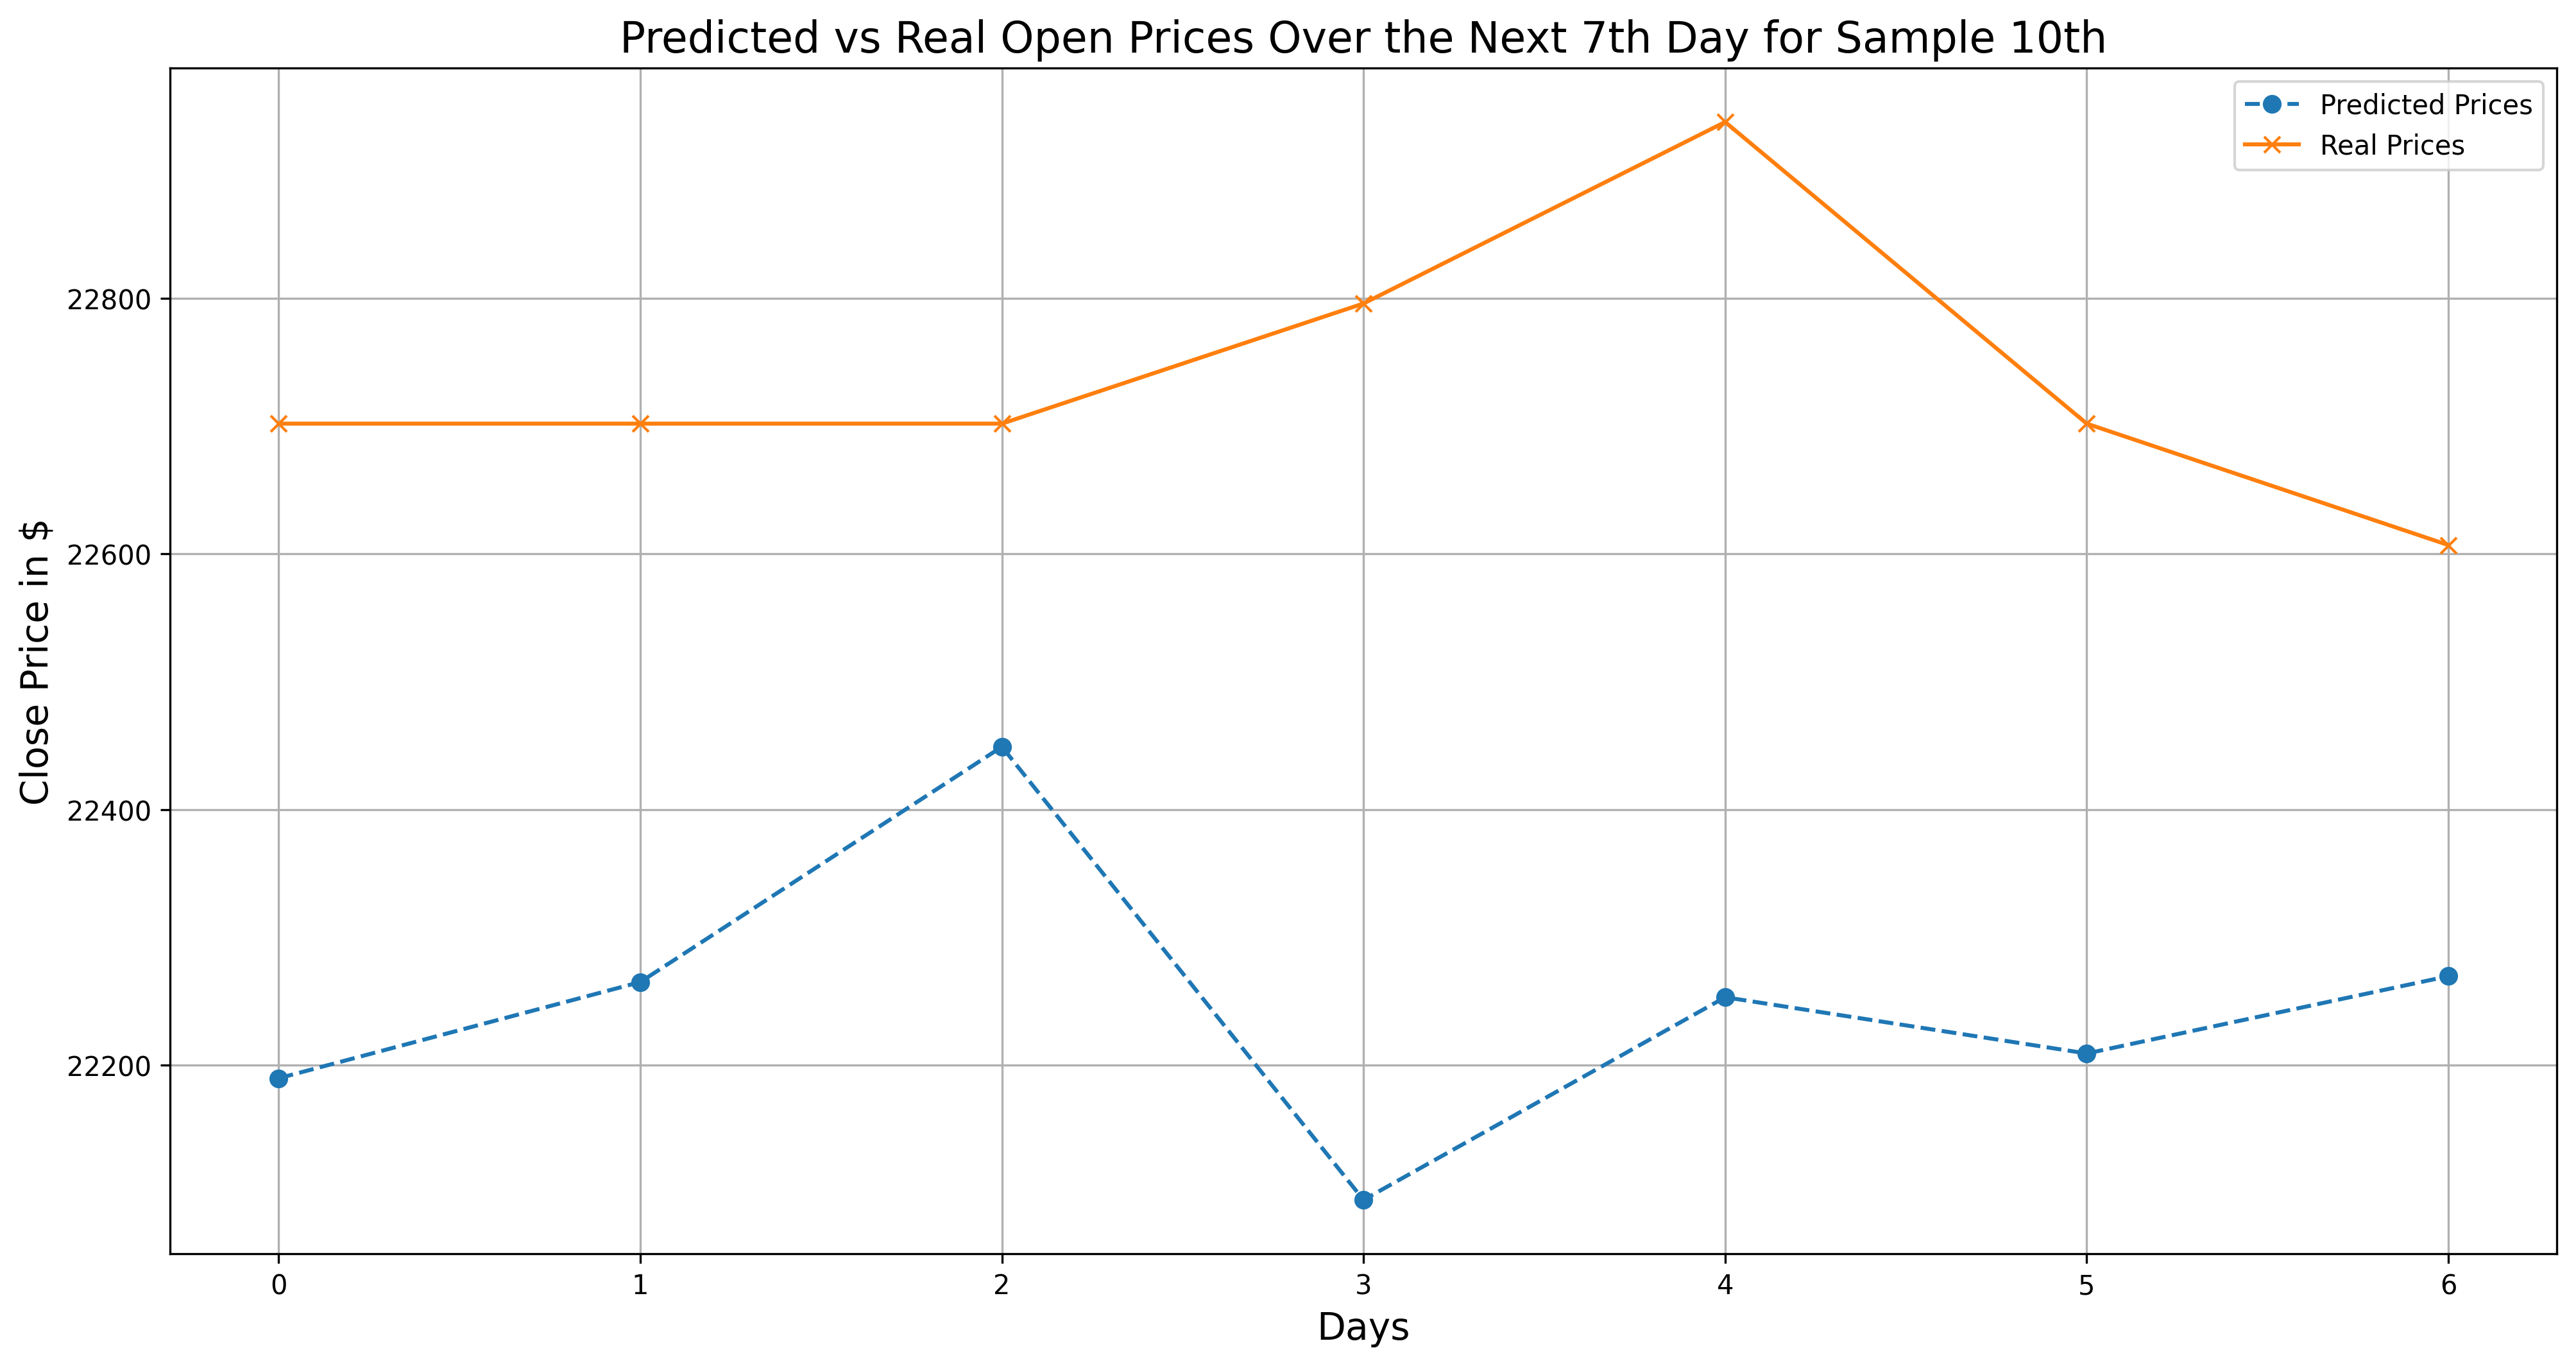

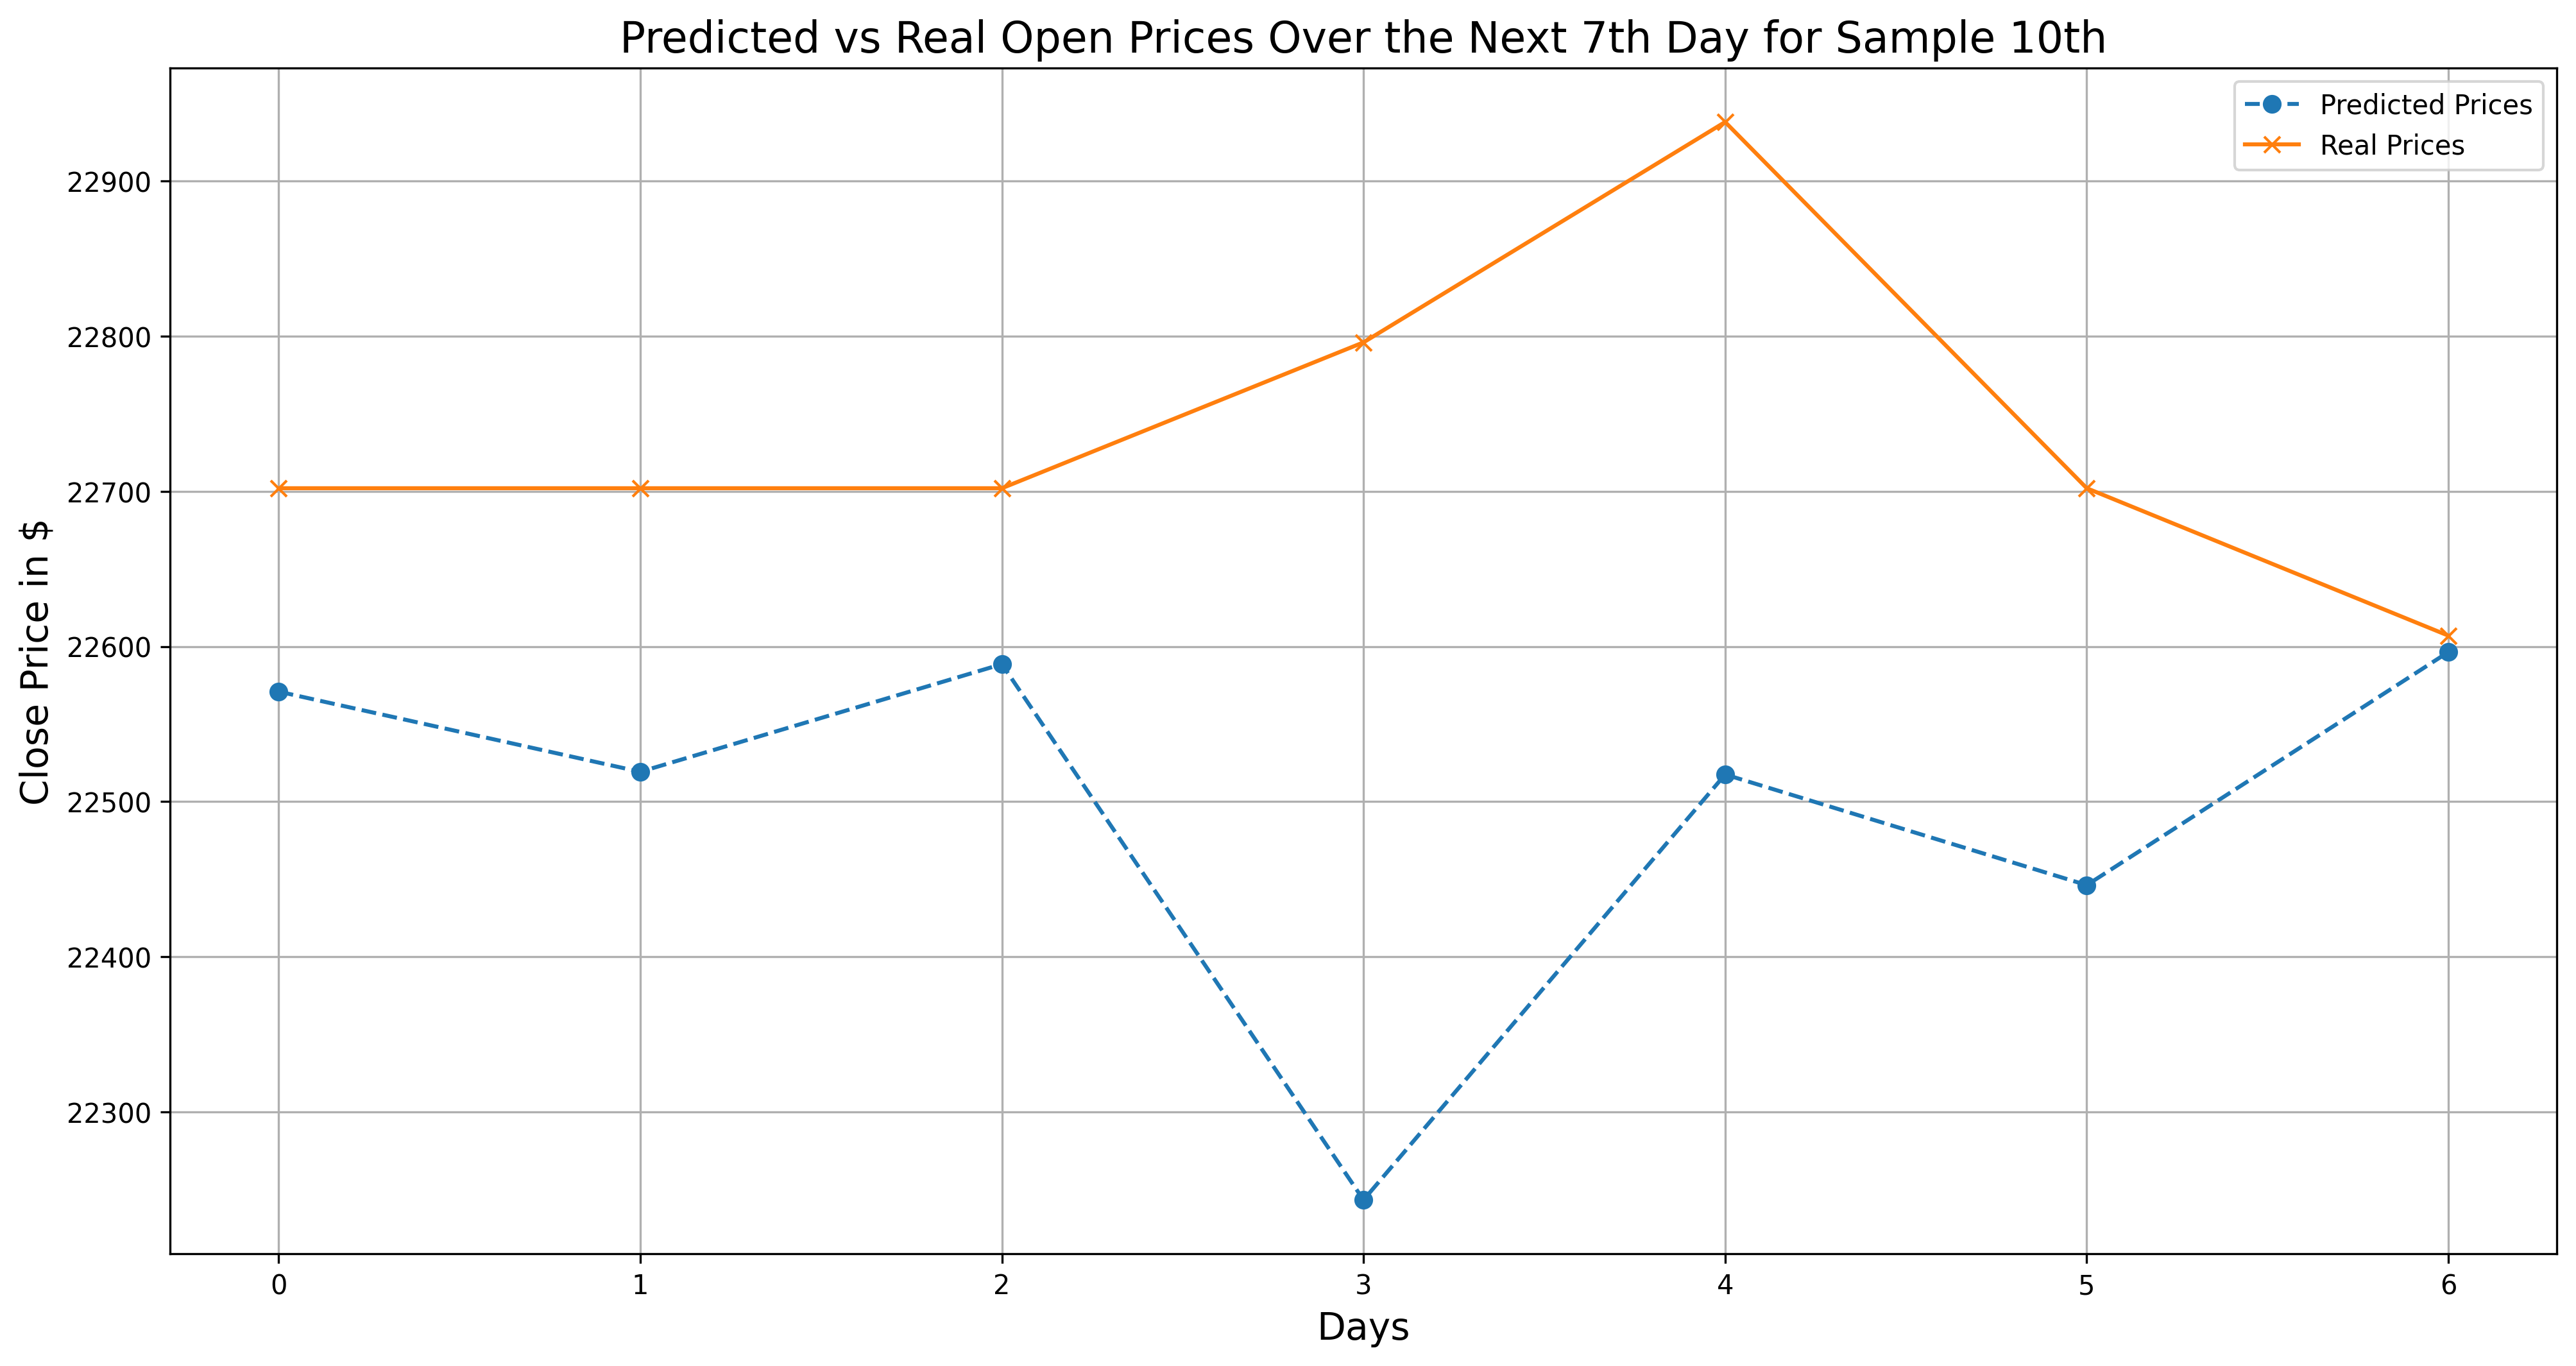

In [ ]:
plot_prediction_timestep(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction_timestep(y_pred_denorm_lstm, y_test, "LSTM")